In [1]:
%load_ext autoreload
%autoreload 2
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../src/')
from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.printing import printer
from m3_learning.viz.layout import layout_fig, labelfigs
from m3_learning.RHEED.AFM import visualize_afm_image, afm_substrate
from m3_learning.RHEED.XRD import plot_xrd, plot_rsm

# from m3_learning.be.dataset import BE_Dataset
printing = printer(basepath = 'Figures/2.AFM_XRD/')

set_style("printing")
random_seed(seed=42)

2023-06-08 13:24:26.478611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-06-08 13:24:27.031189: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/micromamba/envs/m3-RHEED/lib/python3.10/site-packages/cv2/../../lib64:/home/ferroelectric/micromamba/envs/m3-RHEED/lib/python3.10/site-packages/cv2/../../lib64:
2023-06-08 13:24:27.031256: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/micromamba/envs/m3-RHEED/lib/python3.10/site-packages/cv2/../../lib64:/home/ferroelectric/micromamba/envs/m3-RHEED/lib/python3.10/site-packages/cv2/../../lib64:
2023-06-08 13:24:27.031260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlo

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


In [2]:
# Download the data file from Zenodo
download=True
if download:
    # full size version
    urls = ['https://zenodo.org/record/8000271/files/AFM.zip?download=1',
            'https://zenodo.org/record/8000271/files/XRD.zip?download=1']
    
    for url in urls:
        # Specify the filename and the path to save the file
        filename = re.split(r'\?', os.path.basename(url))[0]
        save_path = './../2023_RHEED_PLD_SrTiO3/'

        # download the file
        download_and_unzip(filename, url, save_path)

downloading data


...0%, 0 MB, 155770 KB/s, 0 seconds passed

...0%, 0 MB, 20211 KB/s, 0 seconds passed

...0%, 0 MB, 20638 KB/s, 0 seconds passed

...0%, 0 MB, 365 KB/s, 0 seconds passed

...0%, 0 MB, 451 KB/s, 0 seconds passed

...0%, 0 MB, 538 KB/s, 0 seconds passed

...0%, 0 MB, 626 KB/s, 0 seconds passed

...0%, 0 MB, 713 KB/s, 0 seconds passed

...0%, 0 MB, 800 KB/s, 0 seconds passed

...1%, 0 MB, 630 KB/s, 0 seconds passed

...1%, 0 MB, 690 KB/s, 0 seconds passed

...1%, 0 MB, 548 KB/s, 0 seconds passed

...1%, 0 MB, 592 KB/s, 0 seconds passed

...1%, 0 MB, 525 KB/s, 0 seconds passed

...1%, 0 MB, 561 KB/s, 0 seconds passed

...1%, 0 MB, 597 KB/s, 0 seconds passed

...1%, 0 MB, 633 KB/s, 0 seconds passed

...1%, 0 MB, 548 KB/s, 0 seconds passed

...2%, 0 MB, 577 KB/s, 0 seconds passed

...2%, 0 MB, 607 KB/s, 0 seconds passed

...2%, 0 MB, 636 KB/s, 0 seconds passed

...2%, 0 MB, 666 KB/s, 0 seconds passed

...2%, 0 MB, 695 KB/s, 0 seconds passed

...2%, 0 MB, 640 KB/s, 0 seconds passed

...2%, 0 MB, 666 KB/s, 0 seconds passed

...2%, 0 MB, 691 KB/s, 0 seconds passed

...2%, 0 MB, 717 KB/s, 0 seconds passed

...2%, 0 MB, 640 KB/s, 0 seconds passed

...3%, 0 MB, 661 KB/s, 0 seconds passed

...3%, 0 MB, 683 KB/s, 0 seconds passed

...3%, 0 MB, 705 KB/s, 0 seconds passed

...3%, 0 MB, 663 KB/s, 0 seconds passed

...3%, 0 MB, 682 KB/s, 0 seconds passed

...3%, 0 MB, 702 KB/s, 0 seconds passed

...3%, 0 MB, 722 KB/s, 0 seconds passed

...3%, 0 MB, 660 KB/s, 0 seconds passed

...3%, 0 MB, 677 KB/s, 0 seconds passed

...4%, 0 MB, 694 KB/s, 0 seconds passed

...4%, 0 MB, 712 KB/s, 0 seconds passed

...4%, 0 MB, 677 KB/s, 0 seconds passed

...4%, 0 MB, 693 KB/s, 0 seconds passed

...4%, 0 MB, 708 KB/s, 0 seconds passed

...4%, 0 MB, 725 KB/s, 0 seconds passed

...4%, 0 MB, 673 KB/s, 0 seconds passed

...4%, 0 MB, 688 KB/s, 0 seconds passed

...4%, 0 MB, 702 KB/s, 0 seconds passed

...4%, 0 MB, 716 KB/s, 0 seconds passed

...5%, 0 MB, 687 KB/s, 0 seconds passed

...5%, 0 MB, 700 KB/s, 0 seconds passed

...5%, 0 MB, 714 KB/s, 0 seconds passed

...5%, 0 MB, 727 KB/s, 0 seconds passed

...5%, 0 MB, 684 KB/s, 0 seconds passed

...5%, 0 MB, 696 KB/s, 0 seconds passed

...5%, 0 MB, 708 KB/s, 0 seconds passed

...5%, 0 MB, 721 KB/s, 0 seconds passed

...5%, 0 MB, 694 KB/s, 0 seconds passed

...6%, 0 MB, 705 KB/s, 0 seconds passed

...6%, 0 MB, 717 KB/s, 0 seconds passed

...6%, 0 MB, 729 KB/s, 0 seconds passed

...6%, 0 MB, 691 KB/s, 0 seconds passed

...6%, 0 MB, 701 KB/s, 0 seconds passed

...6%, 0 MB, 712 KB/s, 0 seconds passed

...6%, 0 MB, 723 KB/s, 0 seconds passed

...6%, 0 MB, 700 KB/s, 0 seconds passed

...6%, 0 MB, 710 KB/s, 0 seconds passed

...7%, 0 MB, 720 KB/s, 0 seconds passed

...7%, 0 MB, 730 KB/s, 0 seconds passed

...7%, 0 MB, 696 KB/s, 0 seconds passed

...7%, 0 MB, 706 KB/s, 0 seconds passed

...7%, 0 MB, 715 KB/s, 0 seconds passed

...7%, 0 MB, 725 KB/s, 0 seconds passed

...7%, 0 MB, 704 KB/s, 0 seconds passed

...7%, 0 MB, 713 KB/s, 0 seconds passed

...7%, 0 MB, 722 KB/s, 0 seconds passed

...7%, 0 MB, 731 KB/s, 0 seconds passed

...8%, 0 MB, 701 KB/s, 0 seconds passed

...8%, 0 MB, 709 KB/s, 0 seconds passed

...8%, 0 MB, 718 KB/s, 0 seconds passed

...8%, 0 MB, 727 KB/s, 0 seconds passed

...8%, 0 MB, 707 KB/s, 0 seconds passed

...8%, 0 MB, 716 KB/s, 0 seconds passed

...8%, 0 MB, 724 KB/s, 0 seconds passed

...8%, 0 MB, 732 KB/s, 0 seconds passed

...8%, 0 MB, 705 KB/s, 0 seconds passed

...9%, 0 MB, 712 KB/s, 0 seconds passed

...9%, 0 MB, 720 KB/s, 0 seconds passed

...9%, 0 MB, 728 KB/s, 0 seconds passed

...9%, 0 MB, 711 KB/s, 0 seconds passed

...9%, 0 MB, 718 KB/s, 0 seconds passed

...9%, 0 MB, 726 KB/s, 0 seconds passed

...9%, 0 MB, 734 KB/s, 0 seconds passed

...9%, 0 MB, 708 KB/s, 1 seconds passed

...9%, 0 MB, 715 KB/s, 1 seconds passed

...9%, 0 MB, 723 KB/s, 1 seconds passed

...10%, 0 MB, 730 KB/s, 1 seconds passed

...10%, 0 MB, 713 KB/s, 1 seconds passed

...10%, 0 MB, 720 KB/s, 1 seconds passed

...10%, 0 MB, 728 KB/s, 1 seconds passed

...10%, 0 MB, 735 KB/s, 1 seconds passed

...10%, 0 MB, 711 KB/s, 1 seconds passed

...10%, 0 MB, 718 KB/s, 1 seconds passed

...10%, 0 MB, 724 KB/s, 1 seconds passed

...10%, 0 MB, 731 KB/s, 1 seconds passed

...11%, 0 MB, 716 KB/s, 1 seconds passed

...11%, 0 MB, 722 KB/s, 1 seconds passed

...11%, 0 MB, 729 KB/s, 1 seconds passed

...11%, 0 MB, 735 KB/s, 1 seconds passed

...11%, 0 MB, 713 KB/s, 1 seconds passed

...11%, 0 MB, 720 KB/s, 1 seconds passed

...11%, 0 MB, 726 KB/s, 1 seconds passed

...11%, 0 MB, 732 KB/s, 1 seconds passed

...11%, 0 MB, 718 KB/s, 1 seconds passed

...12%, 0 MB, 724 KB/s, 1 seconds passed

...12%, 0 MB, 730 KB/s, 1 seconds passed

...12%, 0 MB, 736 KB/s, 1 seconds passed

...12%, 0 MB, 715 KB/s, 1 seconds passed

...12%, 0 MB, 721 KB/s, 1 seconds passed

...12%, 0 MB, 727 KB/s, 1 seconds passed

...12%, 0 MB, 733 KB/s, 1 seconds passed

...12%, 0 MB, 719 KB/s, 1 seconds passed

...12%, 0 MB, 725 KB/s, 1 seconds passed

...12%, 0 MB, 731 KB/s, 1 seconds passed

...13%, 0 MB, 736 KB/s, 1 seconds passed

...13%, 0 MB, 717 KB/s, 1 seconds passed

...13%, 0 MB, 722 KB/s, 1 seconds passed

...13%, 0 MB, 728 KB/s, 1 seconds passed

...13%, 0 MB, 733 KB/s, 1 seconds passed

...13%, 1 MB, 721 KB/s, 1 seconds passed

...13%, 1 MB, 726 KB/s, 1 seconds passed

...13%, 1 MB, 731 KB/s, 1 seconds passed

...13%, 1 MB, 737 KB/s, 1 seconds passed

...14%, 1 MB, 718 KB/s, 1 seconds passed

...14%, 1 MB, 723 KB/s, 1 seconds passed

...14%, 1 MB, 728 KB/s, 1 seconds passed

...14%, 1 MB, 733 KB/s, 1 seconds passed

...14%, 1 MB, 722 KB/s, 1 seconds passed

...14%, 1 MB, 727 KB/s, 1 seconds passed

...14%, 1 MB, 732 KB/s, 1 seconds passed

...14%, 1 MB, 737 KB/s, 1 seconds passed

...14%, 1 MB, 719 KB/s, 1 seconds passed

...14%, 1 MB, 724 KB/s, 1 seconds passed

...15%, 1 MB, 729 KB/s, 1 seconds passed

...15%, 1 MB, 734 KB/s, 1 seconds passed

...15%, 1 MB, 723 KB/s, 1 seconds passed

...15%, 1 MB, 728 KB/s, 1 seconds passed

...15%, 1 MB, 732 KB/s, 1 seconds passed

...15%, 1 MB, 737 KB/s, 1 seconds passed

...15%, 1 MB, 721 KB/s, 1 seconds passed

...15%, 1 MB, 725 KB/s, 1 seconds passed

...15%, 1 MB, 730 KB/s, 1 seconds passed

...16%, 1 MB, 734 KB/s, 1 seconds passed

...16%, 1 MB, 724 KB/s, 1 seconds passed

...16%, 1 MB, 728 KB/s, 1 seconds passed

...16%, 1 MB, 733 KB/s, 1 seconds passed

...16%, 1 MB, 738 KB/s, 1 seconds passed

...16%, 1 MB, 721 KB/s, 1 seconds passed

...16%, 1 MB, 726 KB/s, 1 seconds passed

...16%, 1 MB, 730 KB/s, 1 seconds passed

...16%, 1 MB, 735 KB/s, 1 seconds passed

...16%, 1 MB, 725 KB/s, 1 seconds passed

...17%, 1 MB, 729 KB/s, 1 seconds passed

...17%, 1 MB, 733 KB/s, 1 seconds passed

...17%, 1 MB, 738 KB/s, 1 seconds passed

...17%, 1 MB, 722 KB/s, 1 seconds passed

...17%, 1 MB, 726 KB/s, 1 seconds passed

...17%, 1 MB, 685 KB/s, 1 seconds passed

...17%, 1 MB, 689 KB/s, 1 seconds passed

...17%, 1 MB, 693 KB/s, 1 seconds passed

...17%, 1 MB, 697 KB/s, 1 seconds passed

...18%, 1 MB, 700 KB/s, 1 seconds passed

...18%, 1 MB, 704 KB/s, 1 seconds passed

...18%, 1 MB, 708 KB/s, 1 seconds passed

...18%, 1 MB, 712 KB/s, 1 seconds passed

...18%, 1 MB, 716 KB/s, 1 seconds passed

...18%, 1 MB, 720 KB/s, 1 seconds passed

...18%, 1 MB, 695 KB/s, 2 seconds passed

...18%, 1 MB, 699 KB/s, 2 seconds passed

...18%, 1 MB, 703 KB/s, 2 seconds passed

...19%, 1 MB, 706 KB/s, 2 seconds passed

...19%, 1 MB, 710 KB/s, 2 seconds passed

...19%, 1 MB, 714 KB/s, 2 seconds passed

...19%, 1 MB, 718 KB/s, 2 seconds passed

...19%, 1 MB, 722 KB/s, 2 seconds passed

...19%, 1 MB, 697 KB/s, 2 seconds passed

...19%, 1 MB, 700 KB/s, 2 seconds passed

...19%, 1 MB, 704 KB/s, 2 seconds passed

...19%, 1 MB, 708 KB/s, 2 seconds passed

...19%, 1 MB, 711 KB/s, 2 seconds passed

...20%, 1 MB, 715 KB/s, 2 seconds passed

...20%, 1 MB, 691 KB/s, 2 seconds passed

...20%, 1 MB, 695 KB/s, 2 seconds passed

...20%, 1 MB, 698 KB/s, 2 seconds passed

...20%, 1 MB, 702 KB/s, 2 seconds passed

...20%, 1 MB, 705 KB/s, 2 seconds passed

...20%, 1 MB, 709 KB/s, 2 seconds passed

...20%, 1 MB, 712 KB/s, 2 seconds passed

...20%, 1 MB, 715 KB/s, 2 seconds passed

...21%, 1 MB, 693 KB/s, 2 seconds passed

...21%, 1 MB, 697 KB/s, 2 seconds passed

...21%, 1 MB, 700 KB/s, 2 seconds passed

...21%, 1 MB, 703 KB/s, 2 seconds passed

...21%, 1 MB, 707 KB/s, 2 seconds passed

...21%, 1 MB, 710 KB/s, 2 seconds passed

...21%, 1 MB, 713 KB/s, 2 seconds passed

...21%, 1 MB, 717 KB/s, 2 seconds passed

...21%, 1 MB, 695 KB/s, 2 seconds passed

...21%, 1 MB, 698 KB/s, 2 seconds passed

...22%, 1 MB, 701 KB/s, 2 seconds passed

...22%, 1 MB, 704 KB/s, 2 seconds passed

...22%, 1 MB, 707 KB/s, 2 seconds passed

...22%, 1 MB, 711 KB/s, 2 seconds passed

...22%, 1 MB, 714 KB/s, 2 seconds passed

...22%, 1 MB, 717 KB/s, 2 seconds passed

...22%, 1 MB, 696 KB/s, 2 seconds passed

...22%, 1 MB, 699 KB/s, 2 seconds passed

...22%, 1 MB, 703 KB/s, 2 seconds passed

...23%, 1 MB, 706 KB/s, 2 seconds passed

...23%, 1 MB, 709 KB/s, 2 seconds passed

...23%, 1 MB, 712 KB/s, 2 seconds passed

...23%, 1 MB, 715 KB/s, 2 seconds passed

...23%, 1 MB, 718 KB/s, 2 seconds passed

...23%, 1 MB, 698 KB/s, 2 seconds passed

...23%, 1 MB, 701 KB/s, 2 seconds passed

...23%, 1 MB, 704 KB/s, 2 seconds passed

...23%, 1 MB, 707 KB/s, 2 seconds passed

...24%, 1 MB, 710 KB/s, 2 seconds passed

...24%, 1 MB, 713 KB/s, 2 seconds passed

...24%, 1 MB, 716 KB/s, 2 seconds passed

...24%, 1 MB, 719 KB/s, 2 seconds passed

...24%, 1 MB, 700 KB/s, 2 seconds passed

...24%, 1 MB, 702 KB/s, 2 seconds passed

...24%, 1 MB, 705 KB/s, 2 seconds passed

...24%, 1 MB, 708 KB/s, 2 seconds passed

...24%, 1 MB, 711 KB/s, 2 seconds passed

...24%, 1 MB, 714 KB/s, 2 seconds passed

...25%, 1 MB, 717 KB/s, 2 seconds passed

...25%, 1 MB, 720 KB/s, 2 seconds passed

...25%, 1 MB, 701 KB/s, 2 seconds passed

...25%, 1 MB, 704 KB/s, 2 seconds passed

...25%, 1 MB, 707 KB/s, 2 seconds passed

...25%, 1 MB, 709 KB/s, 2 seconds passed

...25%, 1 MB, 712 KB/s, 2 seconds passed

...25%, 1 MB, 715 KB/s, 2 seconds passed

...25%, 1 MB, 718 KB/s, 2 seconds passed

...26%, 1 MB, 721 KB/s, 2 seconds passed

...26%, 1 MB, 702 KB/s, 2 seconds passed

...26%, 1 MB, 705 KB/s, 2 seconds passed

...26%, 1 MB, 708 KB/s, 2 seconds passed

...26%, 1 MB, 710 KB/s, 2 seconds passed

...26%, 1 MB, 713 KB/s, 2 seconds passed

...26%, 1 MB, 716 KB/s, 2 seconds passed

...26%, 1 MB, 718 KB/s, 2 seconds passed

...26%, 1 MB, 721 KB/s, 2 seconds passed

...26%, 1 MB, 704 KB/s, 2 seconds passed

...27%, 1 MB, 706 KB/s, 2 seconds passed

...27%, 2 MB, 709 KB/s, 2 seconds passed

...27%, 2 MB, 711 KB/s, 2 seconds passed

...27%, 2 MB, 714 KB/s, 2 seconds passed

...27%, 2 MB, 717 KB/s, 2 seconds passed

...27%, 2 MB, 719 KB/s, 2 seconds passed

...27%, 2 MB, 722 KB/s, 2 seconds passed

...27%, 2 MB, 705 KB/s, 2 seconds passed

...27%, 2 MB, 707 KB/s, 2 seconds passed

...28%, 2 MB, 710 KB/s, 2 seconds passed

...28%, 2 MB, 712 KB/s, 2 seconds passed

...28%, 2 MB, 715 KB/s, 2 seconds passed

...28%, 2 MB, 717 KB/s, 2 seconds passed

...28%, 2 MB, 720 KB/s, 2 seconds passed

...28%, 2 MB, 722 KB/s, 2 seconds passed

...28%, 2 MB, 705 KB/s, 3 seconds passed

...28%, 2 MB, 708 KB/s, 3 seconds passed

...28%, 2 MB, 710 KB/s, 3 seconds passed

...29%, 2 MB, 713 KB/s, 3 seconds passed

...29%, 2 MB, 715 KB/s, 3 seconds passed

...29%, 2 MB, 718 KB/s, 3 seconds passed

...29%, 2 MB, 720 KB/s, 3 seconds passed

...29%, 2 MB, 723 KB/s, 3 seconds passed

...29%, 2 MB, 706 KB/s, 3 seconds passed

...29%, 2 MB, 709 KB/s, 3 seconds passed

...29%, 2 MB, 711 KB/s, 3 seconds passed

...29%, 2 MB, 713 KB/s, 3 seconds passed

...29%, 2 MB, 716 KB/s, 3 seconds passed

...30%, 2 MB, 718 KB/s, 3 seconds passed

...30%, 2 MB, 721 KB/s, 3 seconds passed

...30%, 2 MB, 723 KB/s, 3 seconds passed

...30%, 2 MB, 707 KB/s, 3 seconds passed

...30%, 2 MB, 710 KB/s, 3 seconds passed

...30%, 2 MB, 712 KB/s, 3 seconds passed

...30%, 2 MB, 714 KB/s, 3 seconds passed

...30%, 2 MB, 717 KB/s, 3 seconds passed

...30%, 2 MB, 719 KB/s, 3 seconds passed

...31%, 2 MB, 721 KB/s, 3 seconds passed

...31%, 2 MB, 724 KB/s, 3 seconds passed

...31%, 2 MB, 708 KB/s, 3 seconds passed

...31%, 2 MB, 710 KB/s, 3 seconds passed

...31%, 2 MB, 713 KB/s, 3 seconds passed

...31%, 2 MB, 715 KB/s, 3 seconds passed

...31%, 2 MB, 717 KB/s, 3 seconds passed

...31%, 2 MB, 719 KB/s, 3 seconds passed

...31%, 2 MB, 722 KB/s, 3 seconds passed

...31%, 2 MB, 724 KB/s, 3 seconds passed

...32%, 2 MB, 709 KB/s, 3 seconds passed

...32%, 2 MB, 711 KB/s, 3 seconds passed

...32%, 2 MB, 713 KB/s, 3 seconds passed

...32%, 2 MB, 716 KB/s, 3 seconds passed

...32%, 2 MB, 718 KB/s, 3 seconds passed

...32%, 2 MB, 720 KB/s, 3 seconds passed

...32%, 2 MB, 722 KB/s, 3 seconds passed

...32%, 2 MB, 724 KB/s, 3 seconds passed

...32%, 2 MB, 709 KB/s, 3 seconds passed

...33%, 2 MB, 711 KB/s, 3 seconds passed

...33%, 2 MB, 714 KB/s, 3 seconds passed

...33%, 2 MB, 716 KB/s, 3 seconds passed

...33%, 2 MB, 718 KB/s, 3 seconds passed

...33%, 2 MB, 720 KB/s, 3 seconds passed

...33%, 2 MB, 722 KB/s, 3 seconds passed

...33%, 2 MB, 724 KB/s, 3 seconds passed

...33%, 2 MB, 710 KB/s, 3 seconds passed

...33%, 2 MB, 712 KB/s, 3 seconds passed

...33%, 2 MB, 714 KB/s, 3 seconds passed

...34%, 2 MB, 716 KB/s, 3 seconds passed

...34%, 2 MB, 718 KB/s, 3 seconds passed

...34%, 2 MB, 721 KB/s, 3 seconds passed

...34%, 2 MB, 706 KB/s, 3 seconds passed

...34%, 2 MB, 708 KB/s, 3 seconds passed

...34%, 2 MB, 710 KB/s, 3 seconds passed

...34%, 2 MB, 712 KB/s, 3 seconds passed

...34%, 2 MB, 715 KB/s, 3 seconds passed

...34%, 2 MB, 717 KB/s, 3 seconds passed

...35%, 2 MB, 719 KB/s, 3 seconds passed

...35%, 2 MB, 721 KB/s, 3 seconds passed

...35%, 2 MB, 707 KB/s, 3 seconds passed

...35%, 2 MB, 709 KB/s, 3 seconds passed

...35%, 2 MB, 711 KB/s, 3 seconds passed

...35%, 2 MB, 713 KB/s, 3 seconds passed

...35%, 2 MB, 715 KB/s, 3 seconds passed

...35%, 2 MB, 717 KB/s, 3 seconds passed

...35%, 2 MB, 719 KB/s, 3 seconds passed

...36%, 2 MB, 721 KB/s, 3 seconds passed

...36%, 2 MB, 708 KB/s, 3 seconds passed

...36%, 2 MB, 710 KB/s, 3 seconds passed

...36%, 2 MB, 712 KB/s, 3 seconds passed

...36%, 2 MB, 714 KB/s, 3 seconds passed

...36%, 2 MB, 716 KB/s, 3 seconds passed

...36%, 2 MB, 718 KB/s, 3 seconds passed

...36%, 2 MB, 720 KB/s, 3 seconds passed

...36%, 2 MB, 722 KB/s, 3 seconds passed

...36%, 2 MB, 709 KB/s, 3 seconds passed

...37%, 2 MB, 711 KB/s, 3 seconds passed

...37%, 2 MB, 712 KB/s, 3 seconds passed

...37%, 2 MB, 714 KB/s, 3 seconds passed

...37%, 2 MB, 716 KB/s, 3 seconds passed

...37%, 2 MB, 718 KB/s, 3 seconds passed

...37%, 2 MB, 720 KB/s, 3 seconds passed

...37%, 2 MB, 722 KB/s, 3 seconds passed

...37%, 2 MB, 709 KB/s, 4 seconds passed

...37%, 2 MB, 711 KB/s, 4 seconds passed

...38%, 2 MB, 713 KB/s, 4 seconds passed

...38%, 2 MB, 715 KB/s, 4 seconds passed

...38%, 2 MB, 717 KB/s, 4 seconds passed

...38%, 2 MB, 719 KB/s, 4 seconds passed

...38%, 2 MB, 706 KB/s, 4 seconds passed

...38%, 2 MB, 708 KB/s, 4 seconds passed

...38%, 2 MB, 710 KB/s, 4 seconds passed

...38%, 2 MB, 712 KB/s, 4 seconds passed

...38%, 2 MB, 713 KB/s, 4 seconds passed

...38%, 2 MB, 715 KB/s, 4 seconds passed

...39%, 2 MB, 717 KB/s, 4 seconds passed

...39%, 2 MB, 719 KB/s, 4 seconds passed

...39%, 2 MB, 707 KB/s, 4 seconds passed

...39%, 2 MB, 708 KB/s, 4 seconds passed

...39%, 2 MB, 710 KB/s, 4 seconds passed

...39%, 2 MB, 712 KB/s, 4 seconds passed

...39%, 2 MB, 714 KB/s, 4 seconds passed

...39%, 2 MB, 716 KB/s, 4 seconds passed

...39%, 2 MB, 717 KB/s, 4 seconds passed

...40%, 2 MB, 719 KB/s, 4 seconds passed

...40%, 2 MB, 707 KB/s, 4 seconds passed

...40%, 2 MB, 709 KB/s, 4 seconds passed

...40%, 2 MB, 711 KB/s, 4 seconds passed

...40%, 2 MB, 712 KB/s, 4 seconds passed

...40%, 2 MB, 714 KB/s, 4 seconds passed

...40%, 2 MB, 716 KB/s, 4 seconds passed

...40%, 3 MB, 704 KB/s, 4 seconds passed

...40%, 3 MB, 706 KB/s, 4 seconds passed

...41%, 3 MB, 708 KB/s, 4 seconds passed

...41%, 3 MB, 709 KB/s, 4 seconds passed

...41%, 3 MB, 711 KB/s, 4 seconds passed

...41%, 3 MB, 713 KB/s, 4 seconds passed

...41%, 3 MB, 714 KB/s, 4 seconds passed

...41%, 3 MB, 716 KB/s, 4 seconds passed

...41%, 3 MB, 705 KB/s, 4 seconds passed

...41%, 3 MB, 707 KB/s, 4 seconds passed

...41%, 3 MB, 708 KB/s, 4 seconds passed

...41%, 3 MB, 710 KB/s, 4 seconds passed

...42%, 3 MB, 712 KB/s, 4 seconds passed

...42%, 3 MB, 713 KB/s, 4 seconds passed

...42%, 3 MB, 715 KB/s, 4 seconds passed

...42%, 3 MB, 717 KB/s, 4 seconds passed

...42%, 3 MB, 705 KB/s, 4 seconds passed

...42%, 3 MB, 707 KB/s, 4 seconds passed

...42%, 3 MB, 709 KB/s, 4 seconds passed

...42%, 3 MB, 710 KB/s, 4 seconds passed

...42%, 3 MB, 712 KB/s, 4 seconds passed

...43%, 3 MB, 714 KB/s, 4 seconds passed

...43%, 3 MB, 703 KB/s, 4 seconds passed

...43%, 3 MB, 704 KB/s, 4 seconds passed

...43%, 3 MB, 706 KB/s, 4 seconds passed

...43%, 3 MB, 708 KB/s, 4 seconds passed

...43%, 3 MB, 709 KB/s, 4 seconds passed

...43%, 3 MB, 711 KB/s, 4 seconds passed

...43%, 3 MB, 712 KB/s, 4 seconds passed

...43%, 3 MB, 714 KB/s, 4 seconds passed

...43%, 3 MB, 703 KB/s, 4 seconds passed

...44%, 3 MB, 705 KB/s, 4 seconds passed

...44%, 3 MB, 707 KB/s, 4 seconds passed

...44%, 3 MB, 708 KB/s, 4 seconds passed

...44%, 3 MB, 710 KB/s, 4 seconds passed

...44%, 3 MB, 711 KB/s, 4 seconds passed

...44%, 3 MB, 713 KB/s, 4 seconds passed

...44%, 3 MB, 715 KB/s, 4 seconds passed

...44%, 3 MB, 704 KB/s, 4 seconds passed

...44%, 3 MB, 705 KB/s, 4 seconds passed

...45%, 3 MB, 707 KB/s, 4 seconds passed

...45%, 3 MB, 709 KB/s, 4 seconds passed

...45%, 3 MB, 710 KB/s, 4 seconds passed

...45%, 3 MB, 712 KB/s, 4 seconds passed

...45%, 3 MB, 713 KB/s, 4 seconds passed

...45%, 3 MB, 715 KB/s, 4 seconds passed

...45%, 3 MB, 705 KB/s, 4 seconds passed

...45%, 3 MB, 706 KB/s, 4 seconds passed

...45%, 3 MB, 708 KB/s, 4 seconds passed

...46%, 3 MB, 709 KB/s, 4 seconds passed

...46%, 3 MB, 711 KB/s, 4 seconds passed

...46%, 3 MB, 712 KB/s, 4 seconds passed

...46%, 3 MB, 714 KB/s, 4 seconds passed

...46%, 3 MB, 715 KB/s, 4 seconds passed

...46%, 3 MB, 705 KB/s, 4 seconds passed

...46%, 3 MB, 707 KB/s, 4 seconds passed

...46%, 3 MB, 708 KB/s, 4 seconds passed

...46%, 3 MB, 710 KB/s, 4 seconds passed

...46%, 3 MB, 711 KB/s, 4 seconds passed

...47%, 3 MB, 713 KB/s, 4 seconds passed

...47%, 3 MB, 714 KB/s, 4 seconds passed

...47%, 3 MB, 716 KB/s, 4 seconds passed

...47%, 3 MB, 706 KB/s, 5 seconds passed

...47%, 3 MB, 707 KB/s, 5 seconds passed

...47%, 3 MB, 709 KB/s, 5 seconds passed

...47%, 3 MB, 710 KB/s, 5 seconds passed

...47%, 3 MB, 712 KB/s, 5 seconds passed

...47%, 3 MB, 713 KB/s, 5 seconds passed

...48%, 3 MB, 715 KB/s, 5 seconds passed

...48%, 3 MB, 716 KB/s, 5 seconds passed

...48%, 3 MB, 706 KB/s, 5 seconds passed

...48%, 3 MB, 707 KB/s, 5 seconds passed

...48%, 3 MB, 709 KB/s, 5 seconds passed

...48%, 3 MB, 710 KB/s, 5 seconds passed

...48%, 3 MB, 711 KB/s, 5 seconds passed

...48%, 3 MB, 713 KB/s, 5 seconds passed

...48%, 3 MB, 714 KB/s, 5 seconds passed

...48%, 3 MB, 716 KB/s, 5 seconds passed

...49%, 3 MB, 707 KB/s, 5 seconds passed

...49%, 3 MB, 708 KB/s, 5 seconds passed

...49%, 3 MB, 710 KB/s, 5 seconds passed

...49%, 3 MB, 711 KB/s, 5 seconds passed

...49%, 3 MB, 712 KB/s, 5 seconds passed

...49%, 3 MB, 714 KB/s, 5 seconds passed

...49%, 3 MB, 715 KB/s, 5 seconds passed

...49%, 3 MB, 717 KB/s, 5 seconds passed

...49%, 3 MB, 707 KB/s, 5 seconds passed

...50%, 3 MB, 709 KB/s, 5 seconds passed

...50%, 3 MB, 710 KB/s, 5 seconds passed

...50%, 3 MB, 711 KB/s, 5 seconds passed

...50%, 3 MB, 713 KB/s, 5 seconds passed

...50%, 3 MB, 714 KB/s, 5 seconds passed

...50%, 3 MB, 716 KB/s, 5 seconds passed

...50%, 3 MB, 717 KB/s, 5 seconds passed

...50%, 3 MB, 708 KB/s, 5 seconds passed

...50%, 3 MB, 709 KB/s, 5 seconds passed

...50%, 3 MB, 711 KB/s, 5 seconds passed

...51%, 3 MB, 712 KB/s, 5 seconds passed

...51%, 3 MB, 713 KB/s, 5 seconds passed

...51%, 3 MB, 715 KB/s, 5 seconds passed

...51%, 3 MB, 716 KB/s, 5 seconds passed

...51%, 3 MB, 718 KB/s, 5 seconds passed

...51%, 3 MB, 708 KB/s, 5 seconds passed

...51%, 3 MB, 710 KB/s, 5 seconds passed

...51%, 3 MB, 711 KB/s, 5 seconds passed

...51%, 3 MB, 712 KB/s, 5 seconds passed

...52%, 3 MB, 714 KB/s, 5 seconds passed

...52%, 3 MB, 715 KB/s, 5 seconds passed

...52%, 3 MB, 717 KB/s, 5 seconds passed

...52%, 3 MB, 718 KB/s, 5 seconds passed

...52%, 3 MB, 709 KB/s, 5 seconds passed

...52%, 3 MB, 710 KB/s, 5 seconds passed

...52%, 3 MB, 711 KB/s, 5 seconds passed

...52%, 3 MB, 713 KB/s, 5 seconds passed

...52%, 3 MB, 714 KB/s, 5 seconds passed

...53%, 3 MB, 716 KB/s, 5 seconds passed

...53%, 3 MB, 717 KB/s, 5 seconds passed

...53%, 3 MB, 718 KB/s, 5 seconds passed

...53%, 3 MB, 709 KB/s, 5 seconds passed

...53%, 3 MB, 711 KB/s, 5 seconds passed

...53%, 3 MB, 712 KB/s, 5 seconds passed

...53%, 3 MB, 713 KB/s, 5 seconds passed

...53%, 3 MB, 715 KB/s, 5 seconds passed

...53%, 3 MB, 716 KB/s, 5 seconds passed

...53%, 3 MB, 717 KB/s, 5 seconds passed

...54%, 3 MB, 719 KB/s, 5 seconds passed

...54%, 3 MB, 710 KB/s, 5 seconds passed

...54%, 3 MB, 711 KB/s, 5 seconds passed

...54%, 4 MB, 712 KB/s, 5 seconds passed

...54%, 4 MB, 714 KB/s, 5 seconds passed

...54%, 4 MB, 715 KB/s, 5 seconds passed

...54%, 4 MB, 716 KB/s, 5 seconds passed

...54%, 4 MB, 718 KB/s, 5 seconds passed

...54%, 4 MB, 719 KB/s, 5 seconds passed

...55%, 4 MB, 710 KB/s, 5 seconds passed

...55%, 4 MB, 712 KB/s, 5 seconds passed

...55%, 4 MB, 713 KB/s, 5 seconds passed

...55%, 4 MB, 714 KB/s, 5 seconds passed

...55%, 4 MB, 715 KB/s, 5 seconds passed

...55%, 4 MB, 717 KB/s, 5 seconds passed

...55%, 4 MB, 718 KB/s, 5 seconds passed

...55%, 4 MB, 719 KB/s, 5 seconds passed

...55%, 4 MB, 711 KB/s, 5 seconds passed

...55%, 4 MB, 712 KB/s, 5 seconds passed

...56%, 4 MB, 713 KB/s, 5 seconds passed

...56%, 4 MB, 715 KB/s, 5 seconds passed

...56%, 4 MB, 716 KB/s, 5 seconds passed

...56%, 4 MB, 717 KB/s, 5 seconds passed

...56%, 4 MB, 718 KB/s, 5 seconds passed

...56%, 4 MB, 720 KB/s, 5 seconds passed

...56%, 4 MB, 711 KB/s, 6 seconds passed

...56%, 4 MB, 712 KB/s, 6 seconds passed

...56%, 4 MB, 714 KB/s, 6 seconds passed

...57%, 4 MB, 715 KB/s, 6 seconds passed

...57%, 4 MB, 716 KB/s, 6 seconds passed

...57%, 4 MB, 718 KB/s, 6 seconds passed

...57%, 4 MB, 719 KB/s, 6 seconds passed

...57%, 4 MB, 720 KB/s, 6 seconds passed

...57%, 4 MB, 712 KB/s, 6 seconds passed

...57%, 4 MB, 713 KB/s, 6 seconds passed

...57%, 4 MB, 714 KB/s, 6 seconds passed

...57%, 4 MB, 715 KB/s, 6 seconds passed

...58%, 4 MB, 717 KB/s, 6 seconds passed

...58%, 4 MB, 718 KB/s, 6 seconds passed

...58%, 4 MB, 719 KB/s, 6 seconds passed

...58%, 4 MB, 720 KB/s, 6 seconds passed

...58%, 4 MB, 712 KB/s, 6 seconds passed

...58%, 4 MB, 713 KB/s, 6 seconds passed

...58%, 4 MB, 714 KB/s, 6 seconds passed

...58%, 4 MB, 716 KB/s, 6 seconds passed

...58%, 4 MB, 717 KB/s, 6 seconds passed

...58%, 4 MB, 718 KB/s, 6 seconds passed

...59%, 4 MB, 719 KB/s, 6 seconds passed

...59%, 4 MB, 721 KB/s, 6 seconds passed

...59%, 4 MB, 712 KB/s, 6 seconds passed

...59%, 4 MB, 714 KB/s, 6 seconds passed

...59%, 4 MB, 715 KB/s, 6 seconds passed

...59%, 4 MB, 716 KB/s, 6 seconds passed

...59%, 4 MB, 717 KB/s, 6 seconds passed

...59%, 4 MB, 718 KB/s, 6 seconds passed

...59%, 4 MB, 720 KB/s, 6 seconds passed

...60%, 4 MB, 721 KB/s, 6 seconds passed

...60%, 4 MB, 713 KB/s, 6 seconds passed

...60%, 4 MB, 714 KB/s, 6 seconds passed

...60%, 4 MB, 715 KB/s, 6 seconds passed

...60%, 4 MB, 716 KB/s, 6 seconds passed

...60%, 4 MB, 717 KB/s, 6 seconds passed

...60%, 4 MB, 719 KB/s, 6 seconds passed

...60%, 4 MB, 720 KB/s, 6 seconds passed

...60%, 4 MB, 721 KB/s, 6 seconds passed

...60%, 4 MB, 713 KB/s, 6 seconds passed

...61%, 4 MB, 714 KB/s, 6 seconds passed

...61%, 4 MB, 715 KB/s, 6 seconds passed

...61%, 4 MB, 717 KB/s, 6 seconds passed

...61%, 4 MB, 718 KB/s, 6 seconds passed

...61%, 4 MB, 719 KB/s, 6 seconds passed

...61%, 4 MB, 720 KB/s, 6 seconds passed

...61%, 4 MB, 721 KB/s, 6 seconds passed

...61%, 4 MB, 714 KB/s, 6 seconds passed

...61%, 4 MB, 715 KB/s, 6 seconds passed

...62%, 4 MB, 716 KB/s, 6 seconds passed

...62%, 4 MB, 717 KB/s, 6 seconds passed

...62%, 4 MB, 718 KB/s, 6 seconds passed

...62%, 4 MB, 719 KB/s, 6 seconds passed

...62%, 4 MB, 720 KB/s, 6 seconds passed

...62%, 4 MB, 722 KB/s, 6 seconds passed

...62%, 4 MB, 714 KB/s, 6 seconds passed

...62%, 4 MB, 715 KB/s, 6 seconds passed

...62%, 4 MB, 716 KB/s, 6 seconds passed

...63%, 4 MB, 717 KB/s, 6 seconds passed

...63%, 4 MB, 718 KB/s, 6 seconds passed

...63%, 4 MB, 720 KB/s, 6 seconds passed

...63%, 4 MB, 721 KB/s, 6 seconds passed

...63%, 4 MB, 722 KB/s, 6 seconds passed

...63%, 4 MB, 714 KB/s, 6 seconds passed

...63%, 4 MB, 715 KB/s, 6 seconds passed

...63%, 4 MB, 716 KB/s, 6 seconds passed

...63%, 4 MB, 717 KB/s, 6 seconds passed

...63%, 4 MB, 719 KB/s, 6 seconds passed

...64%, 4 MB, 720 KB/s, 6 seconds passed

...64%, 4 MB, 721 KB/s, 6 seconds passed

...64%, 4 MB, 722 KB/s, 6 seconds passed

...64%, 4 MB, 714 KB/s, 6 seconds passed

...64%, 4 MB, 715 KB/s, 6 seconds passed

...64%, 4 MB, 717 KB/s, 6 seconds passed

...64%, 4 MB, 718 KB/s, 6 seconds passed

...64%, 4 MB, 719 KB/s, 6 seconds passed

...64%, 4 MB, 720 KB/s, 6 seconds passed

...65%, 4 MB, 721 KB/s, 6 seconds passed

...65%, 4 MB, 722 KB/s, 6 seconds passed

...65%, 4 MB, 715 KB/s, 6 seconds passed

...65%, 4 MB, 716 KB/s, 6 seconds passed

...65%, 4 MB, 717 KB/s, 6 seconds passed

...65%, 4 MB, 718 KB/s, 6 seconds passed

...65%, 4 MB, 719 KB/s, 6 seconds passed

...65%, 4 MB, 720 KB/s, 6 seconds passed

...65%, 4 MB, 721 KB/s, 6 seconds passed

...65%, 4 MB, 722 KB/s, 6 seconds passed

...66%, 4 MB, 715 KB/s, 6 seconds passed

...66%, 4 MB, 716 KB/s, 6 seconds passed

...66%, 4 MB, 717 KB/s, 6 seconds passed

...66%, 4 MB, 718 KB/s, 6 seconds passed

...66%, 4 MB, 719 KB/s, 6 seconds passed

...66%, 4 MB, 720 KB/s, 6 seconds passed

...66%, 4 MB, 721 KB/s, 6 seconds passed

...66%, 4 MB, 722 KB/s, 6 seconds passed

...66%, 4 MB, 715 KB/s, 7 seconds passed

...67%, 4 MB, 716 KB/s, 7 seconds passed

...67%, 4 MB, 717 KB/s, 7 seconds passed

...67%, 4 MB, 718 KB/s, 7 seconds passed

...67%, 4 MB, 719 KB/s, 7 seconds passed

...67%, 4 MB, 720 KB/s, 7 seconds passed

...67%, 4 MB, 721 KB/s, 7 seconds passed

...67%, 4 MB, 722 KB/s, 7 seconds passed

...67%, 4 MB, 715 KB/s, 7 seconds passed

...67%, 4 MB, 716 KB/s, 7 seconds passed

...67%, 5 MB, 717 KB/s, 7 seconds passed

...68%, 5 MB, 718 KB/s, 7 seconds passed

...68%, 5 MB, 719 KB/s, 7 seconds passed

...68%, 5 MB, 721 KB/s, 7 seconds passed

...68%, 5 MB, 722 KB/s, 7 seconds passed

...68%, 5 MB, 723 KB/s, 7 seconds passed

...68%, 5 MB, 716 KB/s, 7 seconds passed

...68%, 5 MB, 717 KB/s, 7 seconds passed

...68%, 5 MB, 718 KB/s, 7 seconds passed

...68%, 5 MB, 719 KB/s, 7 seconds passed

...69%, 5 MB, 720 KB/s, 7 seconds passed

...69%, 5 MB, 721 KB/s, 7 seconds passed

...69%, 5 MB, 722 KB/s, 7 seconds passed

...69%, 5 MB, 723 KB/s, 7 seconds passed

...69%, 5 MB, 716 KB/s, 7 seconds passed

...69%, 5 MB, 717 KB/s, 7 seconds passed

...69%, 5 MB, 718 KB/s, 7 seconds passed

...69%, 5 MB, 719 KB/s, 7 seconds passed

...69%, 5 MB, 720 KB/s, 7 seconds passed

...70%, 5 MB, 721 KB/s, 7 seconds passed

...70%, 5 MB, 722 KB/s, 7 seconds passed

...70%, 5 MB, 723 KB/s, 7 seconds passed

...70%, 5 MB, 716 KB/s, 7 seconds passed

...70%, 5 MB, 717 KB/s, 7 seconds passed

...70%, 5 MB, 718 KB/s, 7 seconds passed

...70%, 5 MB, 719 KB/s, 7 seconds passed

...70%, 5 MB, 720 KB/s, 7 seconds passed

...70%, 5 MB, 721 KB/s, 7 seconds passed

...70%, 5 MB, 722 KB/s, 7 seconds passed

...71%, 5 MB, 723 KB/s, 7 seconds passed

...71%, 5 MB, 716 KB/s, 7 seconds passed

...71%, 5 MB, 717 KB/s, 7 seconds passed

...71%, 5 MB, 718 KB/s, 7 seconds passed

...71%, 5 MB, 719 KB/s, 7 seconds passed

...71%, 5 MB, 720 KB/s, 7 seconds passed

...71%, 5 MB, 721 KB/s, 7 seconds passed

...71%, 5 MB, 722 KB/s, 7 seconds passed

...71%, 5 MB, 724 KB/s, 7 seconds passed

...72%, 5 MB, 725 KB/s, 7 seconds passed

...72%, 5 MB, 726 KB/s, 7 seconds passed

...72%, 5 MB, 727 KB/s, 7 seconds passed

...72%, 5 MB, 728 KB/s, 7 seconds passed

...72%, 5 MB, 721 KB/s, 7 seconds passed

...72%, 5 MB, 722 KB/s, 7 seconds passed

...72%, 5 MB, 723 KB/s, 7 seconds passed

...72%, 5 MB, 724 KB/s, 7 seconds passed

...72%, 5 MB, 725 KB/s, 7 seconds passed

...72%, 5 MB, 726 KB/s, 7 seconds passed

...73%, 5 MB, 727 KB/s, 7 seconds passed

...73%, 5 MB, 728 KB/s, 7 seconds passed

...73%, 5 MB, 729 KB/s, 7 seconds passed

...73%, 5 MB, 730 KB/s, 7 seconds passed

...73%, 5 MB, 731 KB/s, 7 seconds passed

...73%, 5 MB, 732 KB/s, 7 seconds passed

...73%, 5 MB, 733 KB/s, 7 seconds passed

...73%, 5 MB, 734 KB/s, 7 seconds passed

...73%, 5 MB, 728 KB/s, 7 seconds passed

...74%, 5 MB, 729 KB/s, 7 seconds passed

...74%, 5 MB, 730 KB/s, 7 seconds passed

...74%, 5 MB, 731 KB/s, 7 seconds passed

...74%, 5 MB, 732 KB/s, 7 seconds passed

...74%, 5 MB, 733 KB/s, 7 seconds passed

...74%, 5 MB, 734 KB/s, 7 seconds passed

...74%, 5 MB, 734 KB/s, 7 seconds passed

...74%, 5 MB, 735 KB/s, 7 seconds passed

...74%, 5 MB, 736 KB/s, 7 seconds passed

...75%, 5 MB, 737 KB/s, 7 seconds passed

...75%, 5 MB, 738 KB/s, 7 seconds passed

...75%, 5 MB, 739 KB/s, 7 seconds passed

...75%, 5 MB, 740 KB/s, 7 seconds passed

...75%, 5 MB, 734 KB/s, 7 seconds passed

...75%, 5 MB, 735 KB/s, 7 seconds passed

...75%, 5 MB, 736 KB/s, 7 seconds passed

...75%, 5 MB, 737 KB/s, 7 seconds passed

...75%, 5 MB, 738 KB/s, 7 seconds passed

...75%, 5 MB, 739 KB/s, 7 seconds passed

...76%, 5 MB, 740 KB/s, 7 seconds passed

...76%, 5 MB, 741 KB/s, 7 seconds passed

...76%, 5 MB, 742 KB/s, 7 seconds passed

...76%, 5 MB, 743 KB/s, 7 seconds passed

...76%, 5 MB, 744 KB/s, 7 seconds passed

...76%, 5 MB, 745 KB/s, 7 seconds passed

...76%, 5 MB, 746 KB/s, 7 seconds passed

...76%, 5 MB, 747 KB/s, 7 seconds passed

...76%, 5 MB, 740 KB/s, 7 seconds passed

...77%, 5 MB, 741 KB/s, 7 seconds passed

...77%, 5 MB, 742 KB/s, 7 seconds passed

...77%, 5 MB, 743 KB/s, 7 seconds passed

...77%, 5 MB, 744 KB/s, 7 seconds passed

...77%, 5 MB, 745 KB/s, 7 seconds passed

...77%, 5 MB, 746 KB/s, 7 seconds passed

...77%, 5 MB, 747 KB/s, 7 seconds passed

...77%, 5 MB, 748 KB/s, 7 seconds passed

...77%, 5 MB, 749 KB/s, 7 seconds passed

...77%, 5 MB, 750 KB/s, 7 seconds passed

...78%, 5 MB, 751 KB/s, 7 seconds passed

...78%, 5 MB, 752 KB/s, 7 seconds passed

...78%, 5 MB, 753 KB/s, 7 seconds passed

...78%, 5 MB, 746 KB/s, 7 seconds passed

...78%, 5 MB, 747 KB/s, 7 seconds passed

...78%, 5 MB, 748 KB/s, 7 seconds passed

...78%, 5 MB, 749 KB/s, 7 seconds passed

...78%, 5 MB, 750 KB/s, 7 seconds passed

...78%, 5 MB, 751 KB/s, 7 seconds passed

...79%, 5 MB, 752 KB/s, 7 seconds passed

...79%, 5 MB, 753 KB/s, 7 seconds passed

...79%, 5 MB, 754 KB/s, 7 seconds passed

...79%, 5 MB, 755 KB/s, 7 seconds passed

...79%, 5 MB, 756 KB/s, 7 seconds passed

...79%, 5 MB, 757 KB/s, 7 seconds passed

...79%, 5 MB, 758 KB/s, 7 seconds passed

...79%, 5 MB, 759 KB/s, 7 seconds passed

...79%, 5 MB, 760 KB/s, 7 seconds passed

...80%, 5 MB, 761 KB/s, 7 seconds passed

...80%, 5 MB, 754 KB/s, 7 seconds passed

...80%, 5 MB, 755 KB/s, 7 seconds passed

...80%, 5 MB, 756 KB/s, 7 seconds passed

...80%, 5 MB, 757 KB/s, 7 seconds passed

...80%, 5 MB, 758 KB/s, 7 seconds passed

...80%, 5 MB, 759 KB/s, 7 seconds passed

...80%, 5 MB, 760 KB/s, 7 seconds passed

...80%, 5 MB, 761 KB/s, 7 seconds passed

...80%, 5 MB, 762 KB/s, 7 seconds passed

...81%, 5 MB, 763 KB/s, 7 seconds passed

...81%, 5 MB, 764 KB/s, 7 seconds passed

...81%, 5 MB, 765 KB/s, 7 seconds passed

...81%, 5 MB, 766 KB/s, 7 seconds passed

...81%, 5 MB, 767 KB/s, 7 seconds passed

...81%, 6 MB, 760 KB/s, 8 seconds passed

...81%, 6 MB, 761 KB/s, 8 seconds passed

...81%, 6 MB, 762 KB/s, 8 seconds passed

...81%, 6 MB, 763 KB/s, 8 seconds passed

...82%, 6 MB, 764 KB/s, 8 seconds passed

...82%, 6 MB, 765 KB/s, 8 seconds passed

...82%, 6 MB, 766 KB/s, 8 seconds passed

...82%, 6 MB, 767 KB/s, 8 seconds passed

...82%, 6 MB, 768 KB/s, 8 seconds passed

...82%, 6 MB, 769 KB/s, 8 seconds passed

...82%, 6 MB, 769 KB/s, 8 seconds passed

...82%, 6 MB, 770 KB/s, 8 seconds passed

...82%, 6 MB, 771 KB/s, 8 seconds passed

...82%, 6 MB, 772 KB/s, 8 seconds passed

...83%, 6 MB, 773 KB/s, 8 seconds passed

...83%, 6 MB, 774 KB/s, 8 seconds passed

...83%, 6 MB, 768 KB/s, 8 seconds passed

...83%, 6 MB, 769 KB/s, 8 seconds passed

...83%, 6 MB, 770 KB/s, 8 seconds passed

...83%, 6 MB, 771 KB/s, 8 seconds passed

...83%, 6 MB, 771 KB/s, 8 seconds passed

...83%, 6 MB, 772 KB/s, 8 seconds passed

...83%, 6 MB, 773 KB/s, 8 seconds passed

...84%, 6 MB, 774 KB/s, 8 seconds passed

...84%, 6 MB, 775 KB/s, 8 seconds passed

...84%, 6 MB, 776 KB/s, 8 seconds passed

...84%, 6 MB, 777 KB/s, 8 seconds passed

...84%, 6 MB, 778 KB/s, 8 seconds passed

...84%, 6 MB, 779 KB/s, 8 seconds passed

...84%, 6 MB, 780 KB/s, 8 seconds passed

...84%, 6 MB, 781 KB/s, 8 seconds passed

...84%, 6 MB, 782 KB/s, 8 seconds passed

...84%, 6 MB, 775 KB/s, 8 seconds passed

...85%, 6 MB, 776 KB/s, 8 seconds passed

...85%, 6 MB, 777 KB/s, 8 seconds passed

...85%, 6 MB, 778 KB/s, 8 seconds passed

...85%, 6 MB, 779 KB/s, 8 seconds passed

...85%, 6 MB, 780 KB/s, 8 seconds passed

...85%, 6 MB, 781 KB/s, 8 seconds passed

...85%, 6 MB, 782 KB/s, 8 seconds passed

...85%, 6 MB, 783 KB/s, 8 seconds passed

...85%, 6 MB, 784 KB/s, 8 seconds passed

...86%, 6 MB, 784 KB/s, 8 seconds passed

...86%, 6 MB, 785 KB/s, 8 seconds passed

...86%, 6 MB, 786 KB/s, 8 seconds passed

...86%, 6 MB, 787 KB/s, 8 seconds passed

...86%, 6 MB, 788 KB/s, 8 seconds passed

...86%, 6 MB, 789 KB/s, 8 seconds passed

...86%, 6 MB, 783 KB/s, 8 seconds passed

...86%, 6 MB, 784 KB/s, 8 seconds passed

...86%, 6 MB, 785 KB/s, 8 seconds passed

...87%, 6 MB, 785 KB/s, 8 seconds passed

...87%, 6 MB, 786 KB/s, 8 seconds passed

...87%, 6 MB, 787 KB/s, 8 seconds passed

...87%, 6 MB, 788 KB/s, 8 seconds passed

...87%, 6 MB, 789 KB/s, 8 seconds passed

...87%, 6 MB, 790 KB/s, 8 seconds passed

...87%, 6 MB, 791 KB/s, 8 seconds passed

...87%, 6 MB, 792 KB/s, 8 seconds passed

...87%, 6 MB, 793 KB/s, 8 seconds passed

...87%, 6 MB, 794 KB/s, 8 seconds passed

...88%, 6 MB, 795 KB/s, 8 seconds passed

...88%, 6 MB, 795 KB/s, 8 seconds passed

...88%, 6 MB, 796 KB/s, 8 seconds passed

...88%, 6 MB, 790 KB/s, 8 seconds passed

...88%, 6 MB, 791 KB/s, 8 seconds passed

...88%, 6 MB, 792 KB/s, 8 seconds passed

...88%, 6 MB, 793 KB/s, 8 seconds passed

...88%, 6 MB, 794 KB/s, 8 seconds passed

...88%, 6 MB, 794 KB/s, 8 seconds passed

...89%, 6 MB, 795 KB/s, 8 seconds passed

...89%, 6 MB, 796 KB/s, 8 seconds passed

...89%, 6 MB, 797 KB/s, 8 seconds passed

...89%, 6 MB, 798 KB/s, 8 seconds passed

...89%, 6 MB, 799 KB/s, 8 seconds passed

...89%, 6 MB, 800 KB/s, 8 seconds passed

...89%, 6 MB, 801 KB/s, 8 seconds passed

...89%, 6 MB, 802 KB/s, 8 seconds passed

...89%, 6 MB, 802 KB/s, 8 seconds passed

...89%, 6 MB, 803 KB/s, 8 seconds passed

...90%, 6 MB, 804 KB/s, 8 seconds passed

...90%, 6 MB, 805 KB/s, 8 seconds passed

...90%, 6 MB, 799 KB/s, 8 seconds passed

...90%, 6 MB, 800 KB/s, 8 seconds passed

...90%, 6 MB, 801 KB/s, 8 seconds passed

...90%, 6 MB, 801 KB/s, 8 seconds passed

...90%, 6 MB, 802 KB/s, 8 seconds passed

...90%, 6 MB, 803 KB/s, 8 seconds passed

...90%, 6 MB, 804 KB/s, 8 seconds passed

...91%, 6 MB, 805 KB/s, 8 seconds passed

...91%, 6 MB, 806 KB/s, 8 seconds passed

...91%, 6 MB, 807 KB/s, 8 seconds passed

...91%, 6 MB, 808 KB/s, 8 seconds passed

...91%, 6 MB, 809 KB/s, 8 seconds passed

...91%, 6 MB, 809 KB/s, 8 seconds passed

...91%, 6 MB, 810 KB/s, 8 seconds passed

...91%, 6 MB, 811 KB/s, 8 seconds passed

...91%, 6 MB, 812 KB/s, 8 seconds passed

...92%, 6 MB, 813 KB/s, 8 seconds passed

...92%, 6 MB, 814 KB/s, 8 seconds passed

...92%, 6 MB, 808 KB/s, 8 seconds passed

...92%, 6 MB, 808 KB/s, 8 seconds passed

...92%, 6 MB, 809 KB/s, 8 seconds passed

...92%, 6 MB, 810 KB/s, 8 seconds passed

...92%, 6 MB, 811 KB/s, 8 seconds passed

...92%, 6 MB, 812 KB/s, 8 seconds passed

...92%, 6 MB, 813 KB/s, 8 seconds passed

...92%, 6 MB, 814 KB/s, 8 seconds passed

...93%, 6 MB, 815 KB/s, 8 seconds passed

...93%, 6 MB, 815 KB/s, 8 seconds passed

...93%, 6 MB, 816 KB/s, 8 seconds passed

...93%, 6 MB, 817 KB/s, 8 seconds passed

...93%, 6 MB, 818 KB/s, 8 seconds passed

...93%, 6 MB, 819 KB/s, 8 seconds passed

...93%, 6 MB, 820 KB/s, 8 seconds passed

...93%, 6 MB, 821 KB/s, 8 seconds passed

...93%, 6 MB, 821 KB/s, 8 seconds passed

...94%, 6 MB, 822 KB/s, 8 seconds passed

...94%, 6 MB, 816 KB/s, 8 seconds passed

...94%, 6 MB, 817 KB/s, 8 seconds passed

...94%, 6 MB, 818 KB/s, 8 seconds passed

...94%, 6 MB, 819 KB/s, 8 seconds passed

...94%, 6 MB, 819 KB/s, 8 seconds passed

...94%, 6 MB, 820 KB/s, 8 seconds passed

...94%, 6 MB, 821 KB/s, 8 seconds passed

...94%, 6 MB, 822 KB/s, 8 seconds passed

...94%, 6 MB, 823 KB/s, 8 seconds passed

...95%, 6 MB, 824 KB/s, 8 seconds passed

...95%, 7 MB, 825 KB/s, 8 seconds passed

...95%, 7 MB, 826 KB/s, 8 seconds passed

...95%, 7 MB, 826 KB/s, 8 seconds passed

...95%, 7 MB, 827 KB/s, 8 seconds passed

...95%, 7 MB, 828 KB/s, 8 seconds passed

...95%, 7 MB, 829 KB/s, 8 seconds passed

...95%, 7 MB, 830 KB/s, 8 seconds passed

...95%, 7 MB, 831 KB/s, 8 seconds passed

...96%, 7 MB, 824 KB/s, 8 seconds passed

...96%, 7 MB, 825 KB/s, 8 seconds passed

...96%, 7 MB, 826 KB/s, 8 seconds passed

...96%, 7 MB, 827 KB/s, 8 seconds passed

...96%, 7 MB, 828 KB/s, 8 seconds passed

...96%, 7 MB, 829 KB/s, 8 seconds passed

...96%, 7 MB, 830 KB/s, 8 seconds passed

...96%, 7 MB, 830 KB/s, 8 seconds passed

...96%, 7 MB, 831 KB/s, 8 seconds passed

...97%, 7 MB, 832 KB/s, 8 seconds passed

...97%, 7 MB, 833 KB/s, 8 seconds passed

...97%, 7 MB, 834 KB/s, 8 seconds passed

...97%, 7 MB, 835 KB/s, 8 seconds passed

...97%, 7 MB, 836 KB/s, 8 seconds passed

...97%, 7 MB, 836 KB/s, 8 seconds passed

...97%, 7 MB, 837 KB/s, 8 seconds passed

...97%, 7 MB, 838 KB/s, 8 seconds passed

...97%, 7 MB, 839 KB/s, 8 seconds passed

...97%, 7 MB, 840 KB/s, 8 seconds passed

...98%, 7 MB, 841 KB/s, 8 seconds passed

...98%, 7 MB, 834 KB/s, 8 seconds passed

...98%, 7 MB, 835 KB/s, 8 seconds passed

...98%, 7 MB, 836 KB/s, 8 seconds passed

...98%, 7 MB, 837 KB/s, 8 seconds passed

...98%, 7 MB, 838 KB/s, 8 seconds passed

...98%, 7 MB, 839 KB/s, 8 seconds passed

...98%, 7 MB, 839 KB/s, 8 seconds passed

...98%, 7 MB, 840 KB/s, 8 seconds passed

...99%, 7 MB, 841 KB/s, 8 seconds passed

...99%, 7 MB, 842 KB/s, 8 seconds passed

...99%, 7 MB, 843 KB/s, 8 seconds passed

...99%, 7 MB, 844 KB/s, 8 seconds passed

...99%, 7 MB, 845 KB/s, 8 seconds passed

...99%, 7 MB, 845 KB/s, 8 seconds passed

...99%, 7 MB, 846 KB/s, 8 seconds passed

...99%, 7 MB, 847 KB/s, 8 seconds passed

...99%, 7 MB, 848 KB/s, 8 seconds passed

...99%, 7 MB, 849 KB/s, 8 seconds passed

...100%, 7 MB, 850 KB/s, 8 seconds passed

extracting ./../2023_RHEED_PLD_SrTiO3//AFM.zip


downloading data


...1%, 0 MB, 142536 KB/s, 0 seconds passed

...2%, 0 MB, 15507 KB/s, 0 seconds passed

...3%, 0 MB, 16110 KB/s, 0 seconds passed

...4%, 0 MB, 180 KB/s, 0 seconds passed

...6%, 0 MB, 219 KB/s, 0 seconds passed

...7%, 0 MB, 262 KB/s, 0 seconds passed

...8%, 0 MB, 305 KB/s, 0 seconds passed

...9%, 0 MB, 347 KB/s, 0 seconds passed

...10%, 0 MB, 390 KB/s, 0 seconds passed

...12%, 0 MB, 432 KB/s, 0 seconds passed

...13%, 0 MB, 474 KB/s, 0 seconds passed

...14%, 0 MB, 362 KB/s, 0 seconds passed

...15%, 0 MB, 390 KB/s, 0 seconds passed

...17%, 0 MB, 419 KB/s, 0 seconds passed

...18%, 0 MB, 448 KB/s, 0 seconds passed

...19%, 0 MB, 422 KB/s, 0 seconds passed

...20%, 0 MB, 447 KB/s, 0 seconds passed

...21%, 0 MB, 409 KB/s, 0 seconds passed

...23%, 0 MB, 431 KB/s, 0 seconds passed

...24%, 0 MB, 453 KB/s, 0 seconds passed

...25%, 0 MB, 475 KB/s, 0 seconds passed

...26%, 0 MB, 401 KB/s, 0 seconds passed

...27%, 0 MB, 419 KB/s, 0 seconds passed

...29%, 0 MB, 436 KB/s, 0 seconds passed

...30%, 0 MB, 454 KB/s, 0 seconds passed

...31%, 0 MB, 434 KB/s, 0 seconds passed

...32%, 0 MB, 450 KB/s, 0 seconds passed

...34%, 0 MB, 427 KB/s, 0 seconds passed

...35%, 0 MB, 441 KB/s, 0 seconds passed

...36%, 0 MB, 456 KB/s, 0 seconds passed

...37%, 0 MB, 471 KB/s, 0 seconds passed

...38%, 0 MB, 453 KB/s, 0 seconds passed

...40%, 0 MB, 466 KB/s, 0 seconds passed

...41%, 0 MB, 445 KB/s, 0 seconds passed

...42%, 0 MB, 458 KB/s, 0 seconds passed

...43%, 0 MB, 471 KB/s, 0 seconds passed

...44%, 0 MB, 483 KB/s, 0 seconds passed

...46%, 0 MB, 436 KB/s, 0 seconds passed

...47%, 0 MB, 447 KB/s, 0 seconds passed

...48%, 0 MB, 458 KB/s, 0 seconds passed

...49%, 0 MB, 469 KB/s, 0 seconds passed

...51%, 0 MB, 480 KB/s, 0 seconds passed

...52%, 0 MB, 491 KB/s, 0 seconds passed

...53%, 0 MB, 450 KB/s, 0 seconds passed

...54%, 0 MB, 459 KB/s, 0 seconds passed

...55%, 0 MB, 469 KB/s, 0 seconds passed

...57%, 0 MB, 479 KB/s, 0 seconds passed

...58%, 0 MB, 489 KB/s, 0 seconds passed

...59%, 0 MB, 498 KB/s, 0 seconds passed

...60%, 0 MB, 460 KB/s, 0 seconds passed

...62%, 0 MB, 469 KB/s, 0 seconds passed

...63%, 0 MB, 478 KB/s, 0 seconds passed

...64%, 0 MB, 487 KB/s, 0 seconds passed

...65%, 0 MB, 496 KB/s, 0 seconds passed

...66%, 0 MB, 505 KB/s, 0 seconds passed

...68%, 0 MB, 469 KB/s, 0 seconds passed

...69%, 0 MB, 477 KB/s, 0 seconds passed

...70%, 0 MB, 485 KB/s, 0 seconds passed

...71%, 0 MB, 493 KB/s, 0 seconds passed

...72%, 0 MB, 481 KB/s, 0 seconds passed

...74%, 0 MB, 489 KB/s, 0 seconds passed

...75%, 0 MB, 476 KB/s, 1 seconds passed

...76%, 0 MB, 483 KB/s, 1 seconds passed

...77%, 0 MB, 490 KB/s, 1 seconds passed

...79%, 0 MB, 498 KB/s, 1 seconds passed

...80%, 0 MB, 487 KB/s, 1 seconds passed

...81%, 0 MB, 494 KB/s, 1 seconds passed

...82%, 0 MB, 482 KB/s, 1 seconds passed

...83%, 0 MB, 489 KB/s, 1 seconds passed

...85%, 0 MB, 495 KB/s, 1 seconds passed

...86%, 0 MB, 502 KB/s, 1 seconds passed

...87%, 0 MB, 509 KB/s, 1 seconds passed

...88%, 0 MB, 516 KB/s, 1 seconds passed

...89%, 0 MB, 487 KB/s, 1 seconds passed

...91%, 0 MB, 494 KB/s, 1 seconds passed

...92%, 0 MB, 500 KB/s, 1 seconds passed

...93%, 0 MB, 506 KB/s, 1 seconds passed

...94%, 0 MB, 513 KB/s, 1 seconds passed

...96%, 0 MB, 519 KB/s, 1 seconds passed

...97%, 0 MB, 492 KB/s, 1 seconds passed

...98%, 0 MB, 498 KB/s, 1 seconds passed

...99%, 0 MB, 504 KB/s, 1 seconds passed

...100%, 0 MB, 509 KB/s, 1 seconds passed

extracting ./../2023_RHEED_PLD_SrTiO3//XRD.zip


Figures/2.AFM_XRD/treated_213nm-substrate.png


Figures/2.AFM_XRD/treated_213nm-substrate.svg


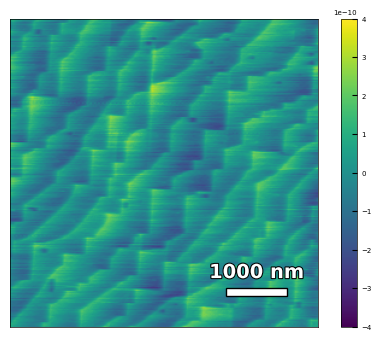

In [3]:
img1 = np.loadtxt('AFM/treated_213nm-substrate.txt')[:256]
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict, 
                    filename='treated_213nm-substrate', printing=printing)

Figures/2.AFM_XRD/treated_213nm-film.png


Figures/2.AFM_XRD/treated_213nm-film.svg


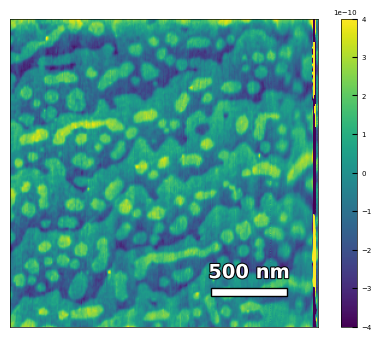

In [4]:
img2 = np.loadtxt('AFM/treated_213nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict, 
                    filename='treated_213nm-film', printing=printing)

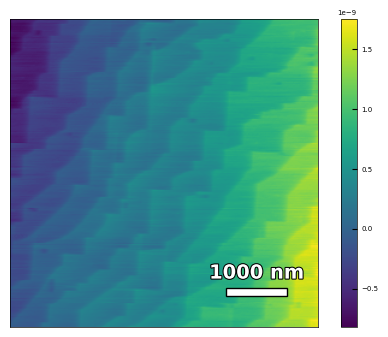

In [5]:
img3 = np.loadtxt('AFM/treated_213nm-substrate-tilted.txt')[:256]

scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img3, colorbar_range=None, figsize=(6,4), scalebar_dict=scalebar_dict)

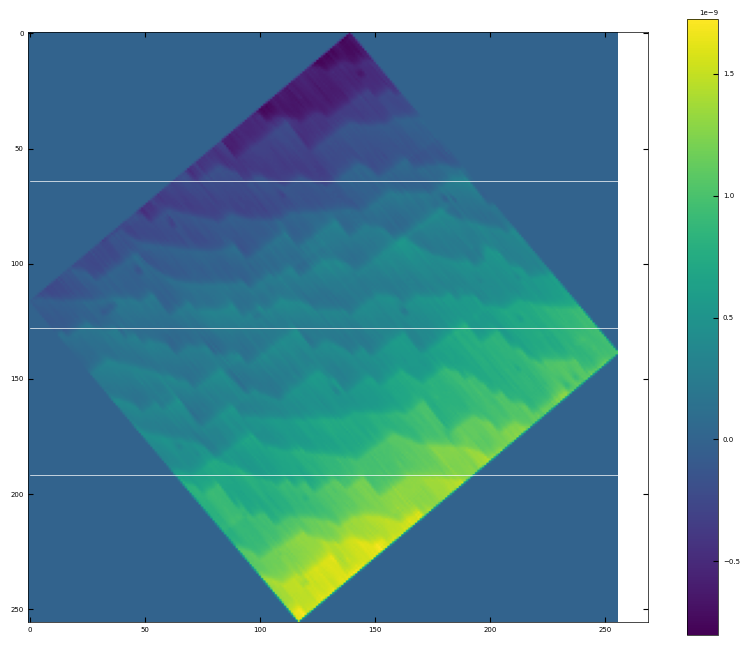

In [6]:
# rotate the angle to make step edges horizontal
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=-50)

In [7]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=1e-5, width=2, xz_angle=3, demo=True)

In [8]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, fixed_height=3.91e-10, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=3, prominence=1e-3, width=2, style='simple', fixed_height=3.91e-10, std_range=1, demo=False)

Step 1: Height = 3.91e-10, Width = 1.62e-07, Miscut = 0.138°
Step 2: Height = 3.91e-10, Width = 1.40e-07, Miscut = 0.160°
Step 3: Height = 3.91e-10, Width = 1.08e-07, Miscut = 0.208°
Step 4: Height = 3.91e-10, Width = 9.57e-08, Miscut = 0.234°
Step 5: Height = 3.91e-10, Width = 1.94e-07, Miscut = 0.115°
Step 6: Height = 3.91e-10, Width = 1.71e-07, Miscut = 0.131°
Step 7: Height = 3.91e-10, Width = 3.99e-08, Miscut = 0.561°
Step 8: Height = 3.91e-10, Width = 1.23e-07, Miscut = 0.183°
Step 9: Height = 3.91e-10, Width = 2.11e-07, Miscut = 0.106°
Results:
  Average step height = 3.91e-10, Standard deviation = 0.00e+00
  Average step width = 1.38e-07, Standard deviation = 5.03e-08
  Average miscut = 0.204°, Standard deviation = 0.132°
Step height = 3.91e-10 +- 0.00e+00
Step width = 2.13e-07 +- 8.87e-08
Miscut = 0.131° +- 0.074°


In [9]:
# calculate the height from afm figure
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=3, prominence=1e-10, width=2, style='simple', std_range=1, demo=False)

Step 1: Height = 1.73e-10, Width = 1.62e-07, Miscut = 0.061°
Step 2: Height = 1.21e-10, Width = 1.40e-07, Miscut = 0.050°
Step 3: Height = -1.00e-10, Width = 1.08e-07, Miscut = -0.053°
Step 4: Height = 1.45e-10, Width = 9.57e-08, Miscut = 0.087°
Step 5: Height = 1.32e-10, Width = 1.94e-07, Miscut = 0.039°
Step 6: Height = 8.74e-11, Width = 1.71e-07, Miscut = 0.029°
Step 7: Height = 1.63e-11, Width = 3.99e-08, Miscut = 0.023°
Step 8: Height = 2.25e-11, Width = 1.23e-07, Miscut = 0.011°
Step 9: Height = 1.05e-10, Width = 2.11e-07, Miscut = 0.029°
Results:
  Average step height = 7.79e-11, Standard deviation = 8.01e-11
  Average step width = 1.38e-07, Standard deviation = 5.03e-08
  Average miscut = 0.031°, Standard deviation = 0.037°
Step height = 1.50e-10 +- 1.28e-10
Step width = 2.13e-07 +- 8.87e-08
Miscut = 0.042° +- 0.038°


In [10]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=100, prominence=1e-11, width=2, xz_angle=0, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_fit(x, z, peak_indices, valley_indices, fixed_height=3.91e-10, demo=True)

step 1: step_width: 1.10e-10, left_peak: (4.99e-07, -4.60e-10), valley: (5.41e-07, -5.11e-10), right_peak: (6.93e-07, -2.94e-10)
step 2: step_width: 4.97e-10, left_peak: (6.93e-07, -2.94e-10), valley: (8.18e-07, -3.74e-10), right_peak: (8.87e-07, -1.42e-10)
step 3: step_width: 2.44e-10, left_peak: (9.57e-07, -1.84e-10), valley: (1.03e-06, -2.97e-10), right_peak: (1.15e-06, -6.09e-11)
step 4: step_width: 2.04e-10, left_peak: (1.33e-06, 1.19e-10), valley: (1.40e-06, 2.98e-11), right_peak: (1.52e-06, 2.37e-10)
step 5: step_width: 2.84e-10, left_peak: (1.52e-06, 2.37e-10), valley: (1.58e-06, 1.46e-10), right_peak: (1.65e-06, 3.88e-10)
step 6: step_width: 3.97e-10, left_peak: (1.73e-06, 2.83e-10), valley: (1.87e-06, 1.73e-10), right_peak: (1.97e-06, 3.74e-10)
step 7: step_width: 5.13e-10, left_peak: (1.97e-06, 3.74e-10), valley: (2.11e-06, 1.85e-10), right_peak: (2.19e-06, 3.79e-10)
step 8: step_width: 2.68e-10, left_peak: (2.19e-06, 3.79e-10), valley: (2.26e-06, 3.16e-10), right_peak: (2.3

Figures/2.AFM_XRD/treated_81nm-substrate.png


Figures/2.AFM_XRD/treated_81nm-substrate.svg


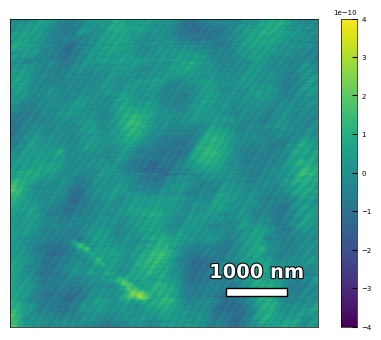

Figures/2.AFM_XRD/treated_81nm-film.png


Figures/2.AFM_XRD/treated_81nm-film.svg


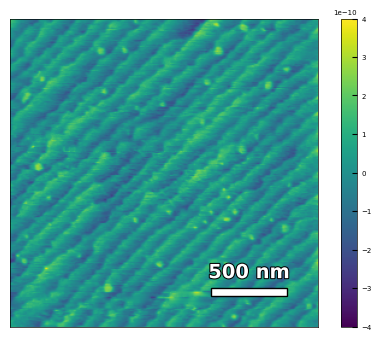

In [11]:
img1 = np.loadtxt('AFM/treated_81nm-substrate.txt')[:256]
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict, 
                    filename='treated_81nm-substrate', printing=printing)

img2 = np.loadtxt('AFM/treated_81nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), scalebar_dict=scalebar_dict, 
                    filename='treated_81nm-film', printing=printing)

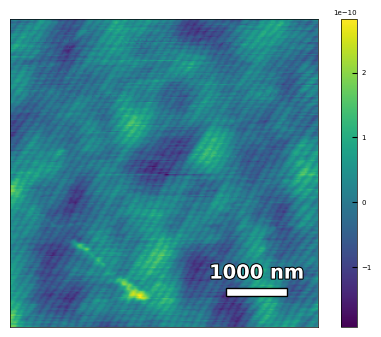

In [12]:
img3 = np.loadtxt('AFM/treated_81nm-substrate.txt')[:256]

scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img3, colorbar_range=None, figsize=(6,4), scalebar_dict=scalebar_dict)

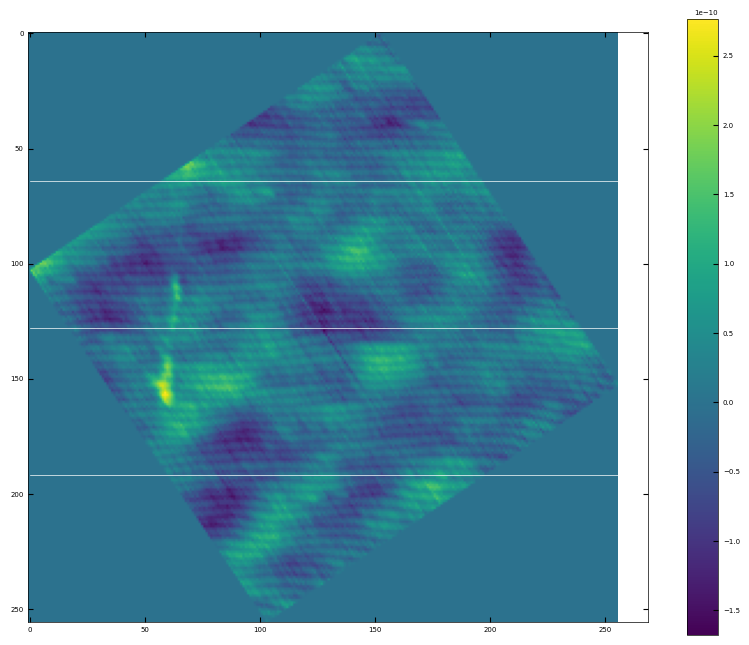

In [13]:
# rotate the angle to make step edges horizontal
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=-56)

In [14]:
prominence = 1e-13
width = 1.5
xz_angle = 0
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=prominence, width=width, xz_angle=xz_angle, demo=True)

In [15]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, fixed_height=3.91e-5, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=xz_angle, prominence=prominence, width=width, 
                                                    style='simple', fixed_height=3.91e-10, std_range=1, demo=False)


Step 1: Height = 3.91e-05, Width = 1.69e-07, Miscut = 89.753°
Step 2: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 3: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 4: Height = 3.91e-05, Width = 9.85e-08, Miscut = 89.856°
Step 5: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 6: Height = 3.91e-05, Width = 1.13e-07, Miscut = 89.835°
Step 7: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 8: Height = 3.91e-05, Width = 8.44e-08, Miscut = 89.876°
Step 9: Height = 3.91e-05, Width = 1.13e-07, Miscut = 89.835°
Step 10: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 11: Height = 3.91e-05, Width = 1.27e-07, Miscut = 89.814°
Step 12: Height = 3.91e-05, Width = 1.69e-07, Miscut = 89.753°
Step 13: Height = 3.91e-05, Width = 1.69e-07, Miscut = 89.753°
Step 14: Height = 3.91e-05, Width = 1.27e-07, Miscut = 89.814°
Step 15: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
Step 16: Height = 3.91e-05, Width = 5.63e-08, Miscut = 89.918°
S

In [16]:
# calculate the height from afm figure
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=2, prominence=1e-2, width=1.5, style='simple', std_range=1, demo=False)


Step 1: Height = -4.61e-11, Width = 1.69e-07, Miscut = -0.016°
Step 2: Height = -1.44e-11, Width = 5.63e-08, Miscut = -0.015°
Step 3: Height = -2.18e-11, Width = 5.63e-08, Miscut = -0.022°
Step 4: Height = -3.33e-11, Width = 9.85e-08, Miscut = -0.019°
Step 5: Height = -6.26e-12, Width = 5.63e-08, Miscut = -0.006°
Step 6: Height = -2.23e-11, Width = 1.13e-07, Miscut = -0.011°
Step 7: Height = 1.97e-11, Width = 5.63e-08, Miscut = 0.020°
Step 8: Height = 3.62e-11, Width = 8.44e-08, Miscut = 0.025°
Step 9: Height = 1.46e-11, Width = 1.13e-07, Miscut = 0.007°
Step 10: Height = 5.60e-11, Width = 5.63e-08, Miscut = 0.057°
Step 11: Height = 1.11e-11, Width = 1.27e-07, Miscut = 0.005°
Step 12: Height = 1.05e-10, Width = 1.69e-07, Miscut = 0.036°
Step 13: Height = 6.57e-11, Width = 1.69e-07, Miscut = 0.022°
Step 14: Height = -1.67e-10, Width = 1.27e-07, Miscut = -0.076°
Step 15: Height = -4.48e-12, Width = 5.63e-08, Miscut = -0.005°
Step 16: Height = -1.28e-12, Width = 5.63e-08, Miscut = -0.001°

In [17]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=100, prominence=1e-13, width=1, xz_angle=0, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_fit(x, z, peak_indices, valley_indices, fixed_height=3.91e-10, demo=True)

step 1: step_width: 4.33e-11, left_peak: (5.35e-07, -7.14e-11), valley: (5.49e-07, -9.73e-11), right_peak: (5.91e-07, -4.48e-11)
step 2: step_width: 3.45e-11, left_peak: (6.75e-07, 7.57e-12), valley: (6.89e-07, -8.11e-12), right_peak: (7.46e-07, 6.73e-11)
step 3: step_width: 1.00e-10, left_peak: (7.46e-07, 6.73e-11), valley: (7.74e-07, 1.30e-11), right_peak: (7.88e-07, 3.60e-11)
step 4: step_width: 6.81e-11, left_peak: (7.88e-07, 3.60e-11), valley: (8.16e-07, -4.68e-12), right_peak: (8.44e-07, 2.27e-11)
step 5: step_width: 7.35e-11, left_peak: (8.44e-07, 2.27e-11), valley: (8.72e-07, -1.13e-11), right_peak: (9.14e-07, 4.78e-11)
step 6: step_width: 4.25e-11, left_peak: (9.14e-07, 4.78e-11), valley: (9.29e-07, 2.03e-11), right_peak: (9.71e-07, 6.54e-11)
step 7: step_width: 6.54e-11, left_peak: (9.71e-07, 6.54e-11), valley: (9.99e-07, 1.68e-11), right_peak: (1.03e-06, 3.35e-11)
step 10: step_width: 1.13e-10, left_peak: (1.17e-06, -4.47e-12), valley: (1.21e-06, -4.84e-11), right_peak: (1.2

In [18]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=0, prominence=1e-13, width=1, style='fit', fixed_height=3.91e-10, std_range=1, demo=False)

Step height = 3.91e-10 +- 0.00e+00
Step width = 8.55e-11 +- 4.62e-11
Miscut = 77.852° +- 5.976°


Figures/2.AFM_XRD/untreated_162nm-substrate.png


Figures/2.AFM_XRD/untreated_162nm-substrate.svg


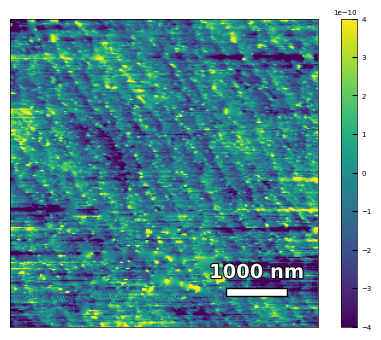

In [19]:
img1 = np.loadtxt('AFM/untreated_162nm-substrate.txt')[:256]
img1 = np.rot90(img1, k=2)
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), 
                    scalebar_dict=scalebar_dict, filename='untreated_162nm-substrate', printing=printing)


Figures/2.AFM_XRD/untreated_162nm-film.png


Figures/2.AFM_XRD/untreated_162nm-film.svg


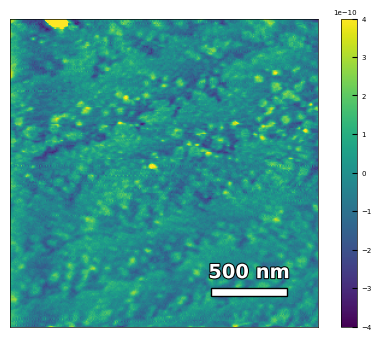

In [20]:
img2 = np.loadtxt('AFM/untreated_162nm-film.txt')[:256]
scalebar_dict = {'image_size': 2008, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-4e-10, 4e-10], figsize=(6,4), 
                    scalebar_dict=scalebar_dict, filename='untreated_162nm-film', printing=printing)

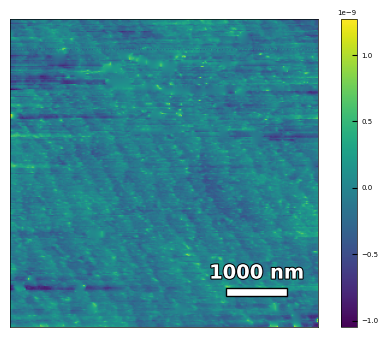

In [21]:
img3 = np.loadtxt('AFM/untreated_162nm-substrate-tilted.txt')[:256]

scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img3, colorbar_range=None, figsize=(6,4), scalebar_dict=scalebar_dict)

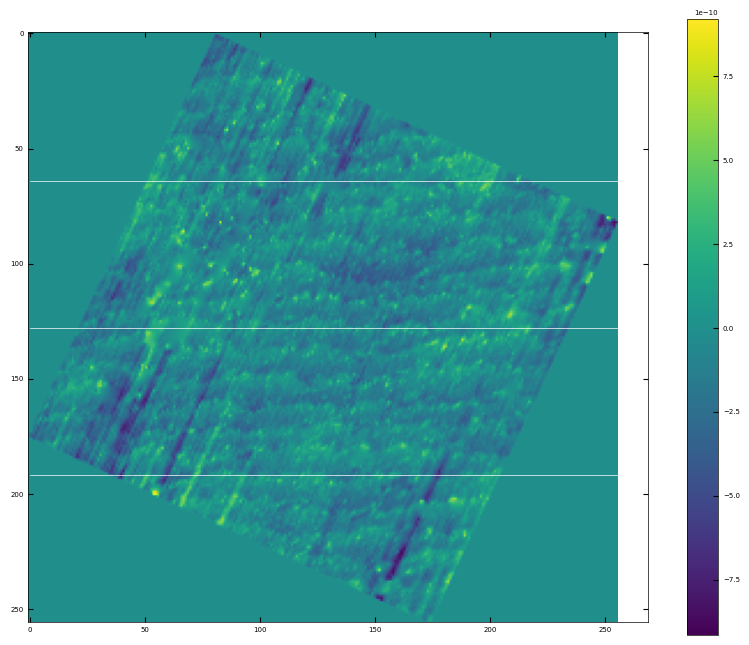

In [22]:
# rotate the angle to make step edges horizontal
analyzer = afm_substrate(img3, pixels=256, size=5e-6)
img_rot, size_rot = analyzer.rotate_image(angle=65)

In [23]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=60, prominence=1e-13, width=2, xz_angle=2, demo=True)

In [24]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, fixed_height=3.91e-10/2, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=2, prominence=1e-13, width=2, style='simple', fixed_height=3.91e-10/2, std_range=1, demo=False)

Step 1: Height = 1.95e-10, Width = 9.41e-08, Miscut = 0.119°
Step 2: Height = 1.95e-10, Width = 9.42e-08, Miscut = 0.119°
Step 3: Height = 1.95e-10, Width = 2.48e-07, Miscut = 0.045°
Step 4: Height = 1.95e-10, Width = 1.30e-07, Miscut = 0.086°
Step 5: Height = 1.95e-10, Width = 1.03e-07, Miscut = 0.109°
Step 6: Height = 1.95e-10, Width = 1.40e-07, Miscut = 0.080°
Step 7: Height = 1.95e-10, Width = 1.09e-07, Miscut = 0.103°
Step 8: Height = 1.95e-10, Width = 1.50e-07, Miscut = 0.075°
Step 9: Height = 1.95e-10, Width = 1.44e-07, Miscut = 0.078°
Step 10: Height = 1.95e-10, Width = 1.47e-07, Miscut = 0.076°
Step 11: Height = 1.95e-10, Width = 1.51e-07, Miscut = 0.074°
Step 12: Height = 1.95e-10, Width = 1.64e-07, Miscut = 0.068°
Step 13: Height = 1.95e-10, Width = 1.29e-07, Miscut = 0.087°
Results:
  Average step height = 1.95e-10, Standard deviation = 0.00e+00
  Average step width = 1.39e-07, Standard deviation = 3.84e-08
  Average miscut = 0.086°, Standard deviation = 0.020°
Step height 

In [25]:
# calculate the height from afm figure
step_heights, step_widths, miscut = analyzer.calculate_simple(x, z, peak_indices, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=2, prominence=1e-13, width=2, style='simple', std_range=1, demo=False)

Step 1: Height = 1.17e-10, Width = 9.41e-08, Miscut = 0.071°
Step 2: Height = -7.96e-11, Width = 9.42e-08, Miscut = -0.048°
Step 3: Height = 3.26e-11, Width = 2.48e-07, Miscut = 0.008°
Step 4: Height = -1.59e-10, Width = 1.30e-07, Miscut = -0.070°
Step 5: Height = 3.95e-10, Width = 1.03e-07, Miscut = 0.221°
Step 6: Height = -2.97e-10, Width = 1.40e-07, Miscut = -0.121°
Step 7: Height = 1.14e-10, Width = 1.09e-07, Miscut = 0.060°
Step 8: Height = 1.53e-10, Width = 1.50e-07, Miscut = 0.058°
Step 9: Height = -3.56e-10, Width = 1.44e-07, Miscut = -0.141°
Step 10: Height = -1.48e-12, Width = 1.47e-07, Miscut = -0.001°
Step 11: Height = -4.59e-11, Width = 1.51e-07, Miscut = -0.017°
Step 12: Height = -3.21e-11, Width = 1.64e-07, Miscut = -0.011°
Step 13: Height = 3.85e-11, Width = 1.29e-07, Miscut = 0.017°
Results:
  Average step height = -9.24e-12, Standard deviation = 1.88e-10
  Average step width = 1.39e-07, Standard deviation = 3.84e-08
  Average miscut = 0.002°, Standard deviation = 0.08

In [26]:
x, z, peak_indices, valley_indices = analyzer.slice_rotate(img_rot, size_rot, j=100, prominence=1e-10, width=1, xz_angle=0, demo=True)
step_heights, step_widths, miscut = analyzer.calculate_fit(x, z, peak_indices, valley_indices, fixed_height=3.91e-10/2, demo=True)

step 0: step_width: 2.91e-09, left_peak: (1.62e-07, 1.37e-10), valley: (2.79e-07, -7.53e-11), right_peak: (2.94e-07, 2.61e-10)
step 1: step_width: 6.61e-10, left_peak: (2.94e-07, 2.61e-10), valley: (3.53e-07, -1.69e-10), right_peak: (4.70e-07, 2.93e-10)
step 2: step_width: 7.06e-10, left_peak: (4.70e-07, 2.93e-10), valley: (5.44e-07, -1.95e-10), right_peak: (5.88e-07, -6.45e-11)
step 3: step_width: 3.13e-10, left_peak: (5.88e-07, -6.45e-11), valley: (6.17e-07, -1.77e-10), right_peak: (6.47e-07, 2.45e-11)
step 4: step_width: 2.24e-10, left_peak: (6.47e-07, 2.45e-11), valley: (6.61e-07, -1.39e-10), right_peak: (7.20e-07, 1.04e-10)
step 5: step_width: 4.08e-10, left_peak: (7.20e-07, 1.04e-10), valley: (7.79e-07, -6.47e-11), right_peak: (8.23e-07, 1.15e-10)
step 6: step_width: 3.86e-10, left_peak: (8.23e-07, 1.15e-10), valley: (8.52e-07, -1.05e-10), right_peak: (9.26e-07, 3.10e-10)
step 7: step_width: 2.25e-09, left_peak: (9.26e-07, 3.10e-10), valley: (1.01e-06, -5.36e-10), right_peak: (1.

In [27]:
# with the provided height from literature
step_heights, step_widths, miscut = analyzer.calculate_substrate_properties(img_rot, size_rot, xz_angle=0, prominence=1e-10, width=1, 
style='fit', fixed_height=3.91e-10/2, std_range=1, demo=False)

Step height = 1.95e-10 +- 2.58e-26
Step width = 8.41e-10 +- 5.97e-10
Miscut = 18.522° +- 10.322°


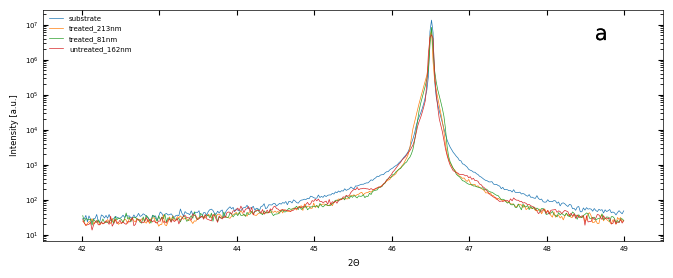

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

files = ['./XRD/substrate-XRD_42_49.xrdml', './XRD/treated_213nm-XRD_42_29.xrdml', './XRD/treated_81nm-XRD_42_29.xrdml', './XRD/untreated_162nm-XRD_42_29.xrdml']
labels = ['substrate', 'treated_213nm', 'treated_81nm', 'untreated_162nm']
plot_xrd(ax, files, labels, diff=None, xrange=(41.5, 49.5))
labelfigs(ax, 0, loc='tr', size=15, style='b', inset_fraction=(0.8, 0.1))

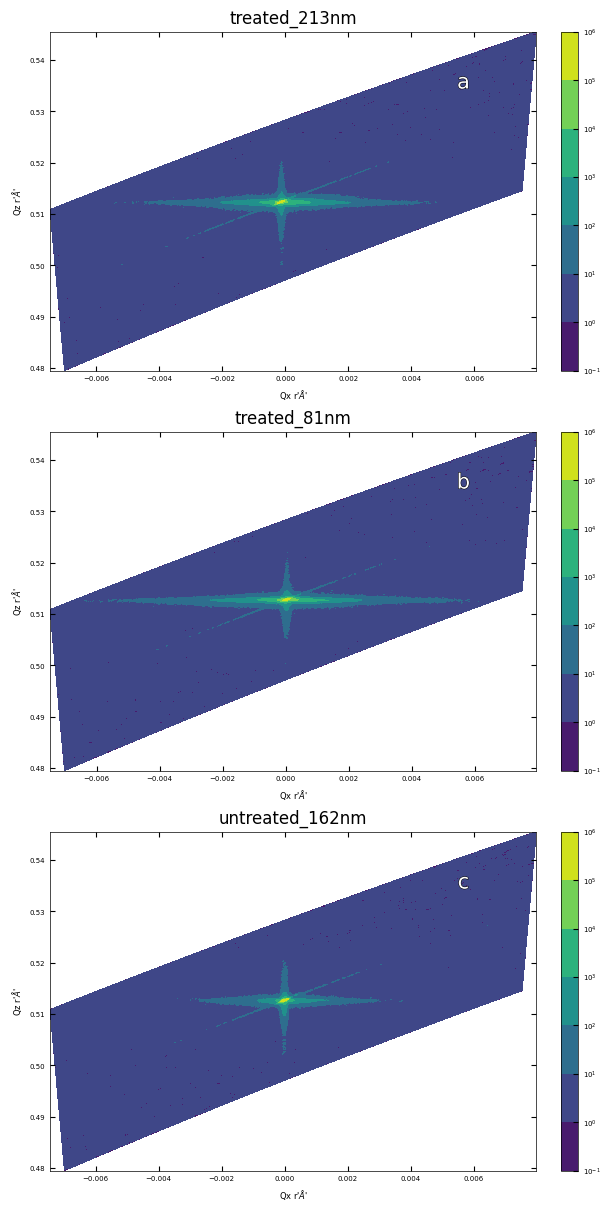

Fig. reciprocal space mapping in (002) for sample a: treated_213nm, b: treated_81nm, c: untreated_162nm.


In [29]:
files = ['./XRD/treated_213nm-RSM_002.xrdml',
         './XRD/treated_81nm-RSM_002.xrdml',
         './XRD/untreated_162nm-RSM_002.xrdml']
titles = ['treated_213nm', 'treated_81nm', 'untreated_162nm']

fig, axes = layout_fig(3, 1, figsize=(6,12))
for i, ax in enumerate(axes):
    plot_rsm(ax, files[i], title=titles[i])
    labelfigs(ax, i, loc='tr', size=15)
plt.show()
print(f'\033[1mFig.\033[0m reciprocal space mapping in (002) for sample a: treated_213nm, b: treated_81nm, c: untreated_162nm.')

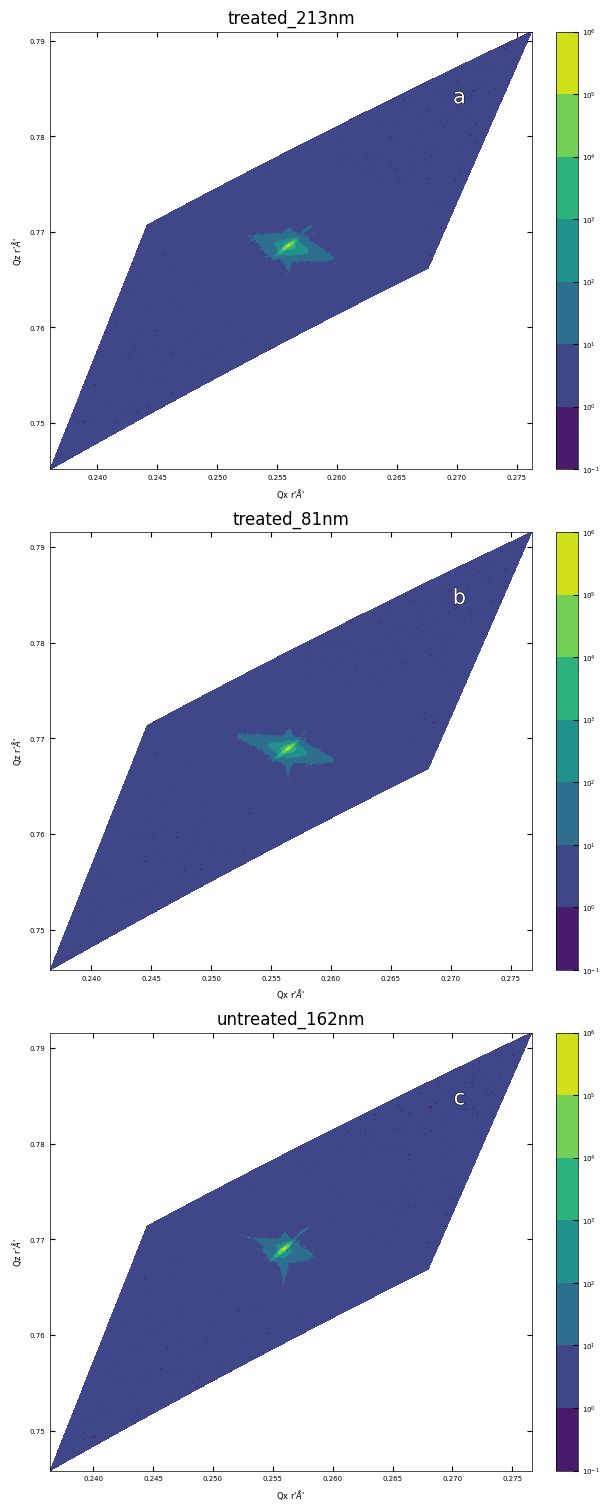

Fig. reciprocal space mapping in (103) for sample a: treated_213nm, b: treated_81nm, c: untreated_162nm.


In [30]:
files = ['./XRD/treated_213nm-RSM_103.xrdml',
         './XRD/treated_81nm-RSM_103.xrdml',
         './XRD/untreated_162nm-RSM_103.xrdml']
titles = ['treated_213nm', 'treated_81nm', 'untreated_162nm']

fig, axes = layout_fig(3, 1, figsize=(6,15))
for i, ax in enumerate(axes):
    plot_rsm(ax, files[i], title=titles[i])
    labelfigs(ax, i, loc='tr', size=15)
plt.show()
print(f'\033[1mFig.\033[0m reciprocal space mapping in (103) for sample a: treated_213nm, b: treated_81nm, c: untreated_162nm.')

Figures/2.AFM_XRD/XRD_RSM.png


Figures/2.AFM_XRD/XRD_RSM.svg


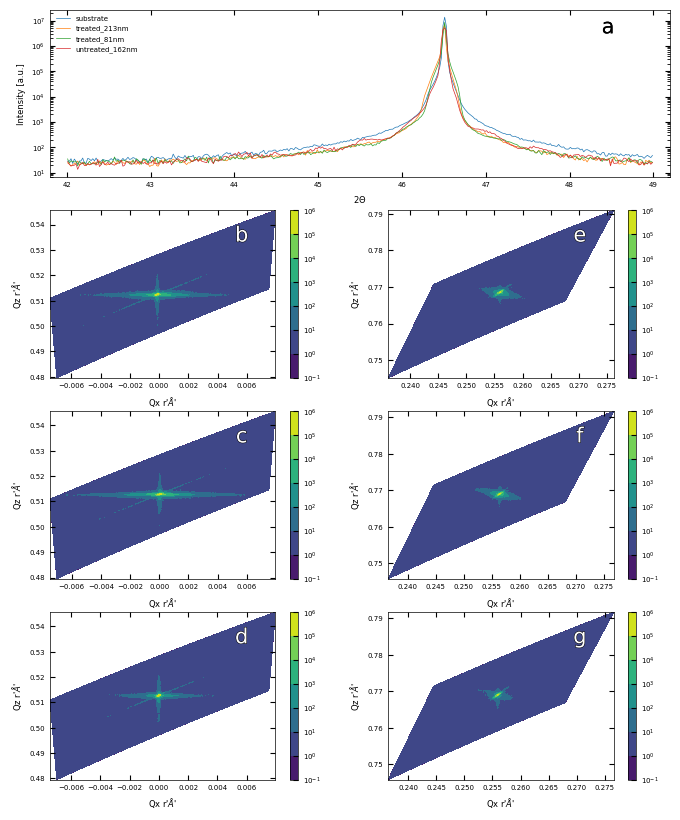

Fig. S2 a X-ray Diffraction result for a typical SrTiO3 substrate and samples. b, c, d Reciprocal Space Mapping results in (002) orientaion for sample treated_213nm, treated_81nm and untreated_162nm, respectively. e, f, g Reciprocal Space Mapping results in (103) orientaion for sample treated_213nm, treated_81nm and untreated_162nm, respectively.


In [31]:
fig = plt.figure(figsize=(8,10))

ax0 = plt.subplot2grid((4, 2), (0, 0), colspan=2)  # colspan=2 means the plot spans 2 columns
files = ['./XRD/substrate-XRD_42_49.xrdml', './XRD/treated_213nm-XRD_42_29.xrdml', './XRD/treated_81nm-XRD_42_29.xrdml', './XRD/untreated_162nm-XRD_42_29.xrdml']
labels = ['substrate', 'treated_213nm', 'treated_81nm', 'untreated_162nm']
plot_xrd(ax0, files, labels, diff=None, xrange=(41.8, 49.2))
labelfigs(ax0, 0, loc='tr', size=15, style='b', inset_fraction=(0.8, 0.1))

files_002 = ['./XRD/treated_213nm-RSM_002.xrdml', './XRD/treated_81nm-RSM_002.xrdml', './XRD/untreated_162nm-RSM_002.xrdml']
for i, file in enumerate(files_002):
    ax = plt.subplot2grid((4, 2), (i+1, 0))
    plot_rsm(ax, file)
    labelfigs(ax, i+1, loc='tr', size=15)

files_103 = ['./XRD/treated_213nm-RSM_103.xrdml', './XRD/treated_81nm-RSM_103.xrdml', './XRD/untreated_162nm-RSM_103.xrdml']
for i, file in enumerate(files_103):
    ax = plt.subplot2grid((4, 2), (i+1, 1))
    plot_rsm(ax, file)
    labelfigs(ax, i+4, loc='tr', size=15)

printing.savefig(fig, 'XRD_RSM')
plt.show() 

print(f'\033[1mFig. S2 a\033[0m X-ray Diffraction result for a typical SrTiO3 substrate and samples. \
\033[1mb, c, d\033[0m Reciprocal Space Mapping results in (002) orientaion for sample treated_213nm, treated_81nm and untreated_162nm, respectively. \
\033[1me, f, g\033[0m Reciprocal Space Mapping results in (103) orientaion for sample treated_213nm, treated_81nm and untreated_162nm, respectively.')